## Business Project - Predictive Model - Factors driving the disability incidence in England

<b>Academic Year : 2022/23
<BR>
Module Code : BDM163
    <br>
Mentored By : Dr. Viktor Pekar
    <br>
Project By : 220303420

<b>This notebook submission consists of data visualization, data transformation and modelling for prediction

## Table of Contents

<b>
1. Importing python libraries 
<br>
<b>
2. Data Loading
<br>
<b>
3. Data Splitting
<br>
<b>
4. Descriptive Statistics and Data Exploration
<br>
<b>
5. Data Preprocessing
<br>
<b>
6. Feature Engineering
<br>
<b>
7. Data Transformation
<br>
<b>
8. Data Scaling
<br>
<b>
9. Baseline Method
<br>
<b>
10. Model Building
    <br>
<b>
11. Model Evaluation on test data
    <br>
<b>
12. Conclusion and Future Improvements


## 1. Importing python libraries 

In [3]:
#Importing python base Libraries
import re
import time
import warnings
import numpy as np
import pandas as pd

#Libraries used for Plotting
import seaborn as sns
sns.set(style="darkgrid")
sns.set_theme() 
import matplotlib.pyplot as plt
%matplotlib inline

# Used for warnings
import warnings
warnings.filterwarnings("ignore")

#Libraries used for Data Splitting, Preprocessing and Cleaning
from sklearn.model_selection import train_test_split


#Libraries used for Data transformation, dummies
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# used for data scaling
from sklearn.preprocessing import StandardScaler

In [4]:
#used for building different models

#For Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#For Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#For Random forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#For Support Vector Regression
from sklearn.svm import SVR

#For Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor

#For Lasso Regressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

#For Ridge Regressor
from sklearn.linear_model import Ridge, RidgeCV

#For XGBoost Regressor
from xgboost import XGBRegressor

#For Gradient Boost Regressor
from sklearn.ensemble import GradientBoostingRegressor

#For Gradient Descent Regressor
from sklearn.linear_model import SGDRegressor

#used to store the model  
import os
from joblib import dump

#used to load the saved model
from joblib import load

#used to check the word count of the jupyter notebook
import io
from nbformat import read, NO_CONVERT

## 2. Data Loading

In [5]:
#Data Preparation
# Reading and loading the csv data into dataframe
census_df = pd.read_excel('Disability_Census_Data_regionwise_updated.xlsx')

In [6]:
#checking the number of rows and columns imported
print(census_df.shape)

(1080, 19)


In [7]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 1080 non-null   int64  
 1   Region                               1080 non-null   object 
 2   Sex                                  1080 non-null   object 
 3   Age                                  1080 non-null   object 
 4   No_of_disability_per_1000_of_pop     1080 non-null   float64
 5   LFE                                  1080 non-null   float64
 6   Smoking                              1080 non-null   float64
 7   Deaths                               1080 non-null   int64  
 8   ASMR                                 1080 non-null   float64
 9   GPs                                  1080 non-null   int64  
 10  Median_Income                        1080 non-null   int64  
 11  No_Of_Jobs                    

In [8]:
# Validating / Overview the loaded census data
census_df.head()

,Year,Region,Sex,Age,No_of_disability_per_1000_of_pop,LFE,Smoking,Deaths,ASMR,GPs,Median_Income,No_Of_Jobs,Marital_status_single,Marital_status_Married,Marital_status_Seperated,Marital_status_Divorced,Marital_status_Widowed,Household_Deprived_1_more_dimension,Fertility_Rate
0,2001,North East,Female,Under 1,1.8,79.46,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
1,2001,North East,Female,1 to 4,3.4,78.81,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
2,2001,North East,Female,5 to 9,4.7,74.89,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
3,2001,North East,Female,10 to 14,4.7,69.92,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
4,2001,North East,Female,15 to 19,5.5,64.95,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6


In [9]:
#checking the number of rows and columns imported
print(census_df.shape)

(1080, 19)


In [10]:
#explore the data columns/features and understand their datatypes and null values if any
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 1080 non-null   int64  
 1   Region                               1080 non-null   object 
 2   Sex                                  1080 non-null   object 
 3   Age                                  1080 non-null   object 
 4   No_of_disability_per_1000_of_pop     1080 non-null   float64
 5   LFE                                  1080 non-null   float64
 6   Smoking                              1080 non-null   float64
 7   Deaths                               1080 non-null   int64  
 8   ASMR                                 1080 non-null   float64
 9   GPs                                  1080 non-null   int64  
 10  Median_Income                        1080 non-null   int64  
 11  No_Of_Jobs                    

In [11]:
# Validating / Overview census data
census_df.head()

,Year,Region,Sex,Age,No_of_disability_per_1000_of_pop,LFE,Smoking,Deaths,ASMR,GPs,Median_Income,No_Of_Jobs,Marital_status_single,Marital_status_Married,Marital_status_Seperated,Marital_status_Divorced,Marital_status_Widowed,Household_Deprived_1_more_dimension,Fertility_Rate
0,2001,North East,Female,Under 1,1.8,79.46,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
1,2001,North East,Female,1 to 4,3.4,78.81,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
2,2001,North East,Female,5 to 9,4.7,74.89,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
3,2001,North East,Female,10 to 14,4.7,69.92,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
4,2001,North East,Female,15 to 19,5.5,64.95,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6


In [12]:
census_df.isna().sum()

Year                                   0
Region                                 0
Sex                                    0
Age                                    0
No_of_disability_per_1000_of_pop       0
LFE                                    0
Smoking                                0
Deaths                                 0
ASMR                                   0
GPs                                    0
Median_Income                          0
No_Of_Jobs                             0
Marital_status_single                  0
Marital_status_Married                 0
Marital_status_Seperated               0
Marital_status_Divorced                0
Marital_status_Widowed                 0
Household_Deprived_1_more_dimension    0
Fertility_Rate                         0
dtype: int64

## 3. Data Splitting


<b>In order to train and test the predictive model ,we need to split the X and y dataframes into train and test data sets
<br>We should set aside the test part of the dataset, to avoid data snooping (bias) and should not explore the test data as it might assist us in pre-processing and making biased algorithm choices and would lead to over optimistic evaluation of model accuracy

In [13]:
#To ensure we have the same split and the same result, we need to define the random state.
#We will split the dataset in 80% train and 20% test

train_set, test_set = train_test_split(census_df, test_size=0.2, random_state=2023)
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

864 train and 216 test instances


In [14]:
#shape of the 2 dataframes
print(train_set.shape)
print(test_set.shape)


(864, 19)
(216, 19)


## 3. Descriptive Statistics and Data Exploration

<b>Some predictor variables will be used for predictive modelling and so descriptive statistical analysis will help us to understand the correlation between variables.
Data exploration will help us understand the outliers, missing values etc
    <br>
As an industry practice we should not explore/snoop the test data and hence all our data exploration would be done only on training dataset



In [15]:
# To understand the distribution of the numerical values, one can use the describe() method of a dataframe:
train_set.describe().round(2)

,Year,No_of_disability_per_1000_of_pop,LFE,Smoking,Deaths,ASMR,GPs,Median_Income,No_Of_Jobs,Marital_status_single,Marital_status_Married,Marital_status_Seperated,Marital_status_Divorced,Marital_status_Widowed,Household_Deprived_1_more_dimension,Fertility_Rate
count,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00
mean,2010.94,24.73,40.52,21.30,36763.29,955.00,732.31,21448.80,964.08,33.59,45.26,2.44,8.89,7.23,56.75,1.75
std,8.19,23.72,25.18,6.22,17076.05,356.79,244.95,6580.41,319.80,4.50,2.79,0.24,0.68,1.10,4.57,0.15
min,2001.00,0.80,3.73,9.50,12400.00,410.70,323.00,10668.00,373.00,26.80,37.40,2.10,7.40,5.00,48.00,1.57
25%,2001.00,6.50,17.01,15.10,24490.00,629.70,575.00,15874.00,783.00,29.00,44.00,2.30,8.50,6.30,53.20,1.62
50%,2011.00,14.50,39.60,22.10,30509.00,1046.20,646.00,20582.00,932.00,33.90,45.60,2.30,9.20,7.20,57.20,1.67
75%,2021.00,37.08,62.94,27.20,51979.00,1223.20,861.00,25976.00,1141.00,35.80,46.90,2.60,9.40,8.10,60.30,1.95
max,2021.00,93.30,84.13,30.60,79575.00,1511.80,1192.00,36449.00,1857.00,44.10,49.90,3.20,9.80,9.30,64.95,1.99


In [16]:
# Validating /listing the train dataframe 
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 586 to 855
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 864 non-null    int64  
 1   Region                               864 non-null    object 
 2   Sex                                  864 non-null    object 
 3   Age                                  864 non-null    object 
 4   No_of_disability_per_1000_of_pop     864 non-null    float64
 5   LFE                                  864 non-null    float64
 6   Smoking                              864 non-null    float64
 7   Deaths                               864 non-null    int64  
 8   ASMR                                 864 non-null    float64
 9   GPs                                  864 non-null    int64  
 10  Median_Income                        864 non-null    int64  
 11  No_Of_Jobs                    

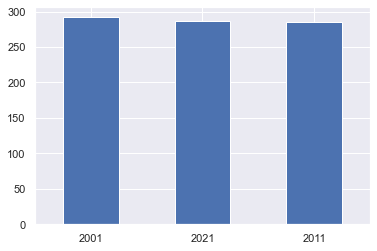

In [17]:
train_set["Year"].value_counts().plot(kind="bar", rot=0)

Another way to inspect the distribution of the variables is to plot histograms. 

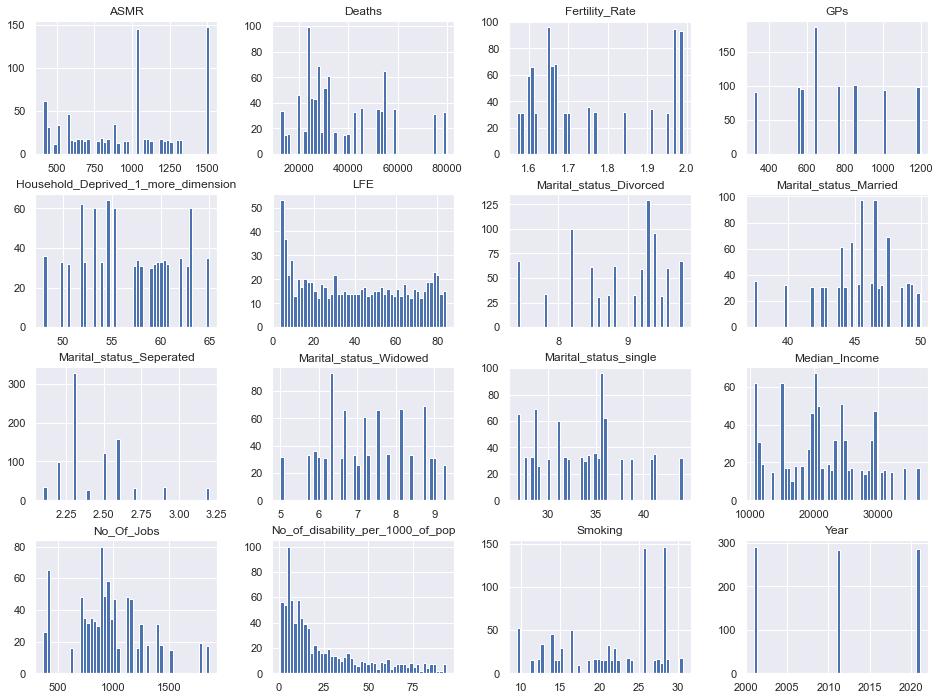

In [18]:
# plotting a histogram for all numerical variables by calling the hist() method on the dataframe
dummy = train_set.hist(bins=50, figsize=(16,12))

<b>Analyzing different Regions of England and their mean age specific percentages of disability

In [19]:
train_set['Region'].unique()

array(['East of England', 'East Midlands', 'South East', 'South West',
       'North East', 'North West', 'West Midlands',
       'Yorkshire and The Humber', 'London'], dtype=object)

In [20]:
train_set["No_of_disability_per_1000_of_pop"].sort_values(ascending=False)

379     93.3
539     93.3
419     93.2
499     92.8
459     92.4
        ... 
880      1.0
840      0.9
1040     0.9
1000     0.9
980      0.8
Name: No_of_disability_per_1000_of_pop, Length: 864, dtype: float64

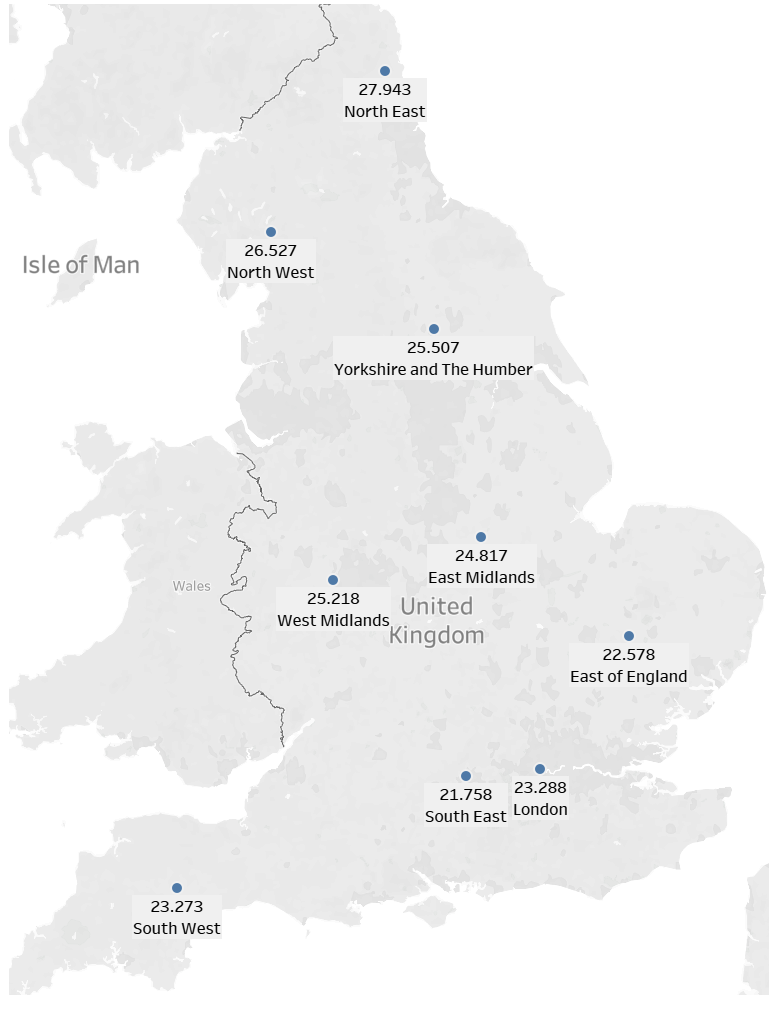

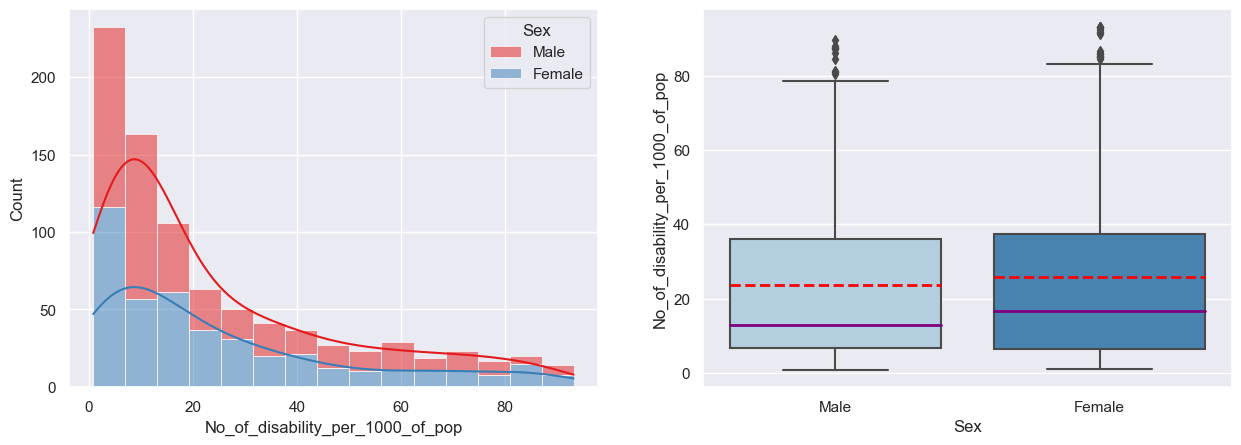

In [21]:
plt.figure(figsize=(15, 5), dpi=100)
plt.subplot(1,2,1)

sns.histplot(data=train_set, x ='No_of_disability_per_1000_of_pop', hue='Sex',kde=True,
             multiple="stack", palette="Set1", bins=15, linewidth=0.5) 

plt.subplot(1,2,2)
#Define plot object

sns.boxplot( y=train_set["No_of_disability_per_1000_of_pop"], x=train_set["Sex"],
            medianprops={'linewidth': 2, 'color': 'purple'},
           showmeans=True, meanline=True, palette="Blues",            
           meanprops={'linewidth': 2, 'color': 'red'})


plt.show()

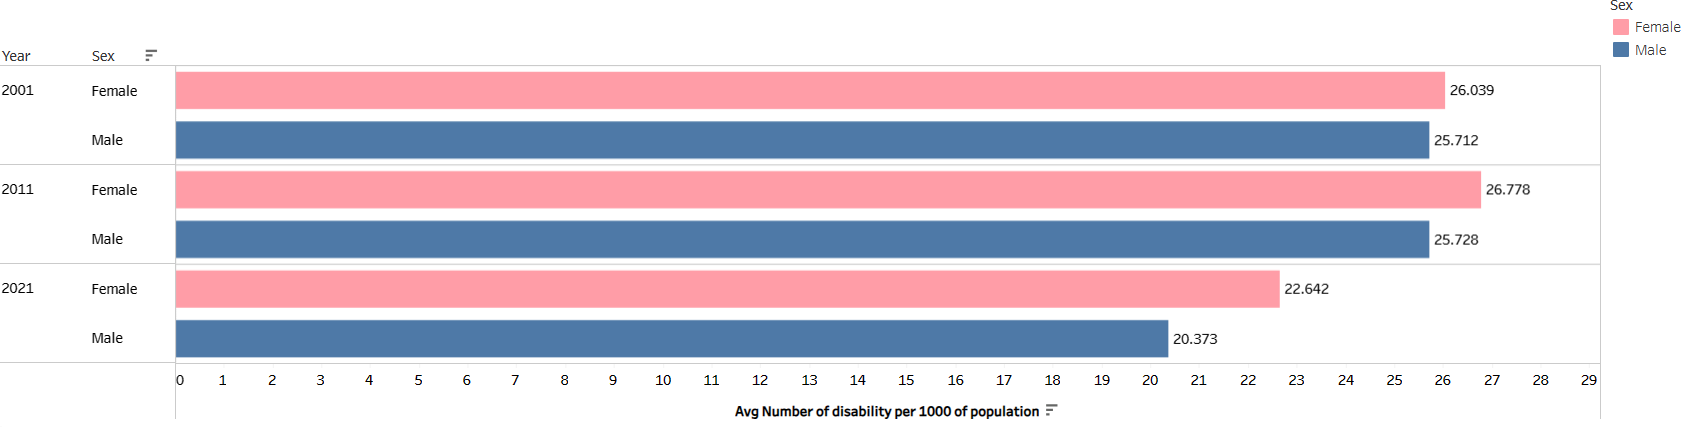

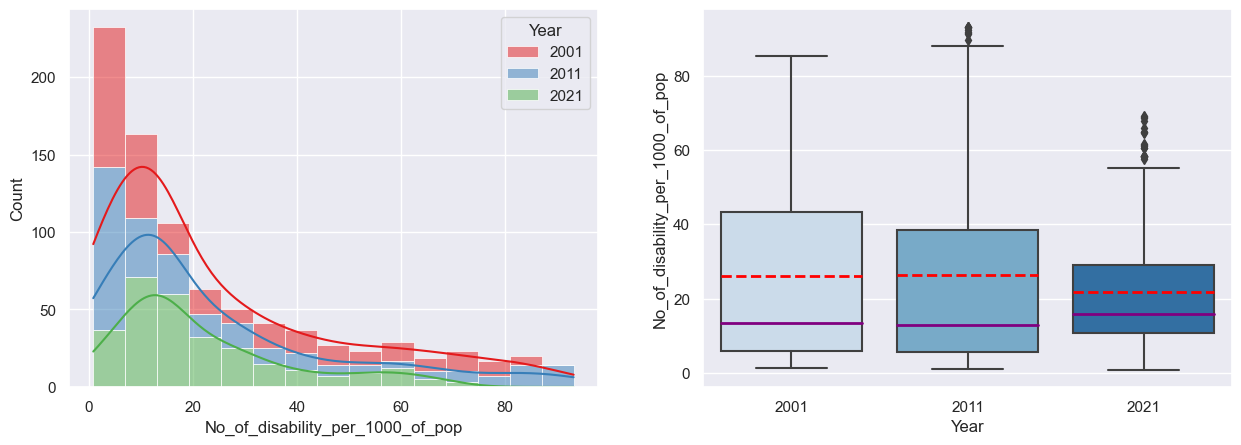

In [22]:
plt.figure(figsize=(15, 5), dpi=100)
plt.subplot(1,2,1)

sns.histplot(data=train_set, x ='No_of_disability_per_1000_of_pop', hue='Year',kde=True,
             multiple="stack", palette="Set1", bins=15, linewidth=0.5) 

plt.subplot(1,2,2)
#Define plot object

sns.boxplot( y=train_set["No_of_disability_per_1000_of_pop"], x=train_set["Year"],
            medianprops={'linewidth': 2, 'color': 'purple'},
           showmeans=True, meanline=True, palette="Blues",            
           meanprops={'linewidth': 2, 'color': 'red'})


plt.show()

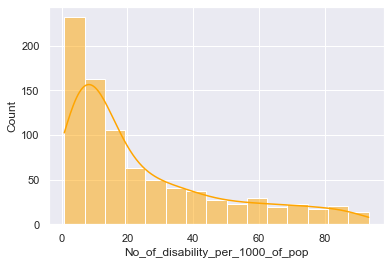

In [23]:
sns.histplot(train_set['No_of_disability_per_1000_of_pop'],kde=True , color='orange')

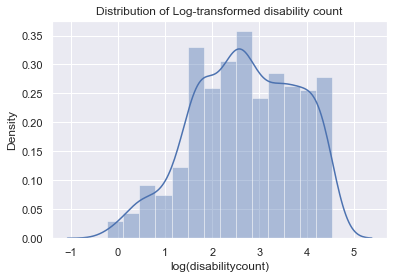

In [24]:
sns.distplot(np.log(train_set['No_of_disability_per_1000_of_pop']))
plt.title('Distribution of Log-transformed disability count')
plt.xlabel('log(disabilitycount)')
plt.show()

In [25]:
print('Disability count has a skew of ' + str(train_set['No_of_disability_per_1000_of_pop'].skew().round(decimals=2)) + 
      ' while the log-transformed disability count improves the skew to ' + 
      str(np.log(train_set['No_of_disability_per_1000_of_pop']).skew().round(decimals=2)))

Disability count has a skew of 1.21 while the log-transformed disability count improves the skew to -0.25


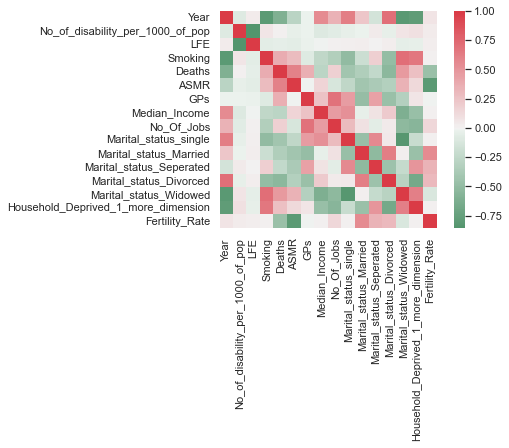

In [26]:
cmap=sns.diverging_palette(500,10,as_cmap=True)
sns.heatmap(train_set.corr(),cmap=cmap,center=0, annot=False,square=True)

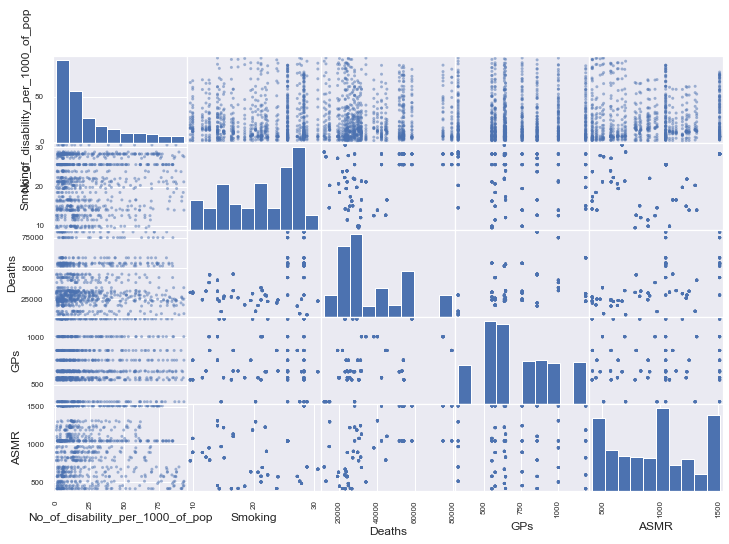

In [27]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
attributes = ["No_of_disability_per_1000_of_pop","Smoking","Deaths","GPs","ASMR"]
dummy = scatter_matrix(train_set[attributes], figsize=(12, 8))

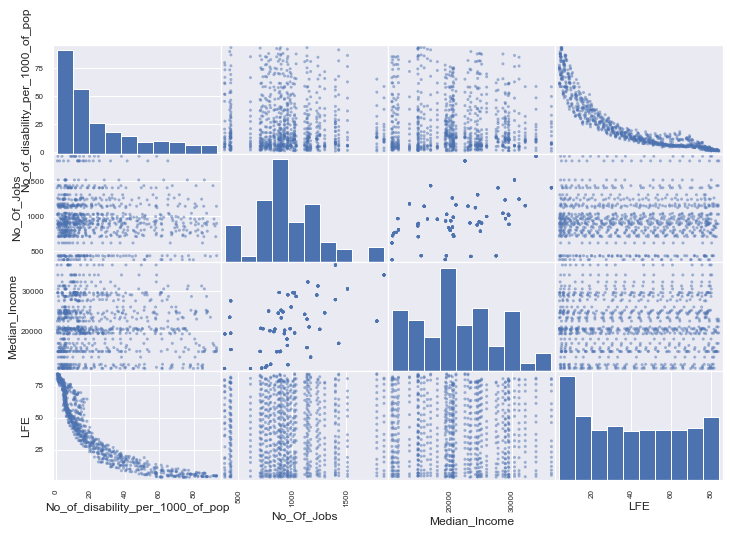

In [28]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
attributes = ["No_of_disability_per_1000_of_pop","No_Of_Jobs","Median_Income" ,"LFE"]
dummy = scatter_matrix(train_set[attributes], figsize=(12, 8))

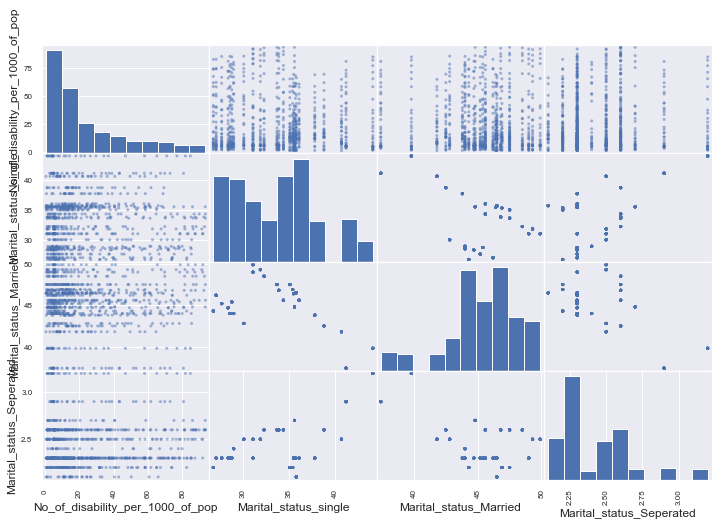

In [29]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
attributes = ["No_of_disability_per_1000_of_pop","Marital_status_single","Marital_status_Married" ,"Marital_status_Seperated"]
dummy = scatter_matrix(train_set[attributes], figsize=(12, 8))

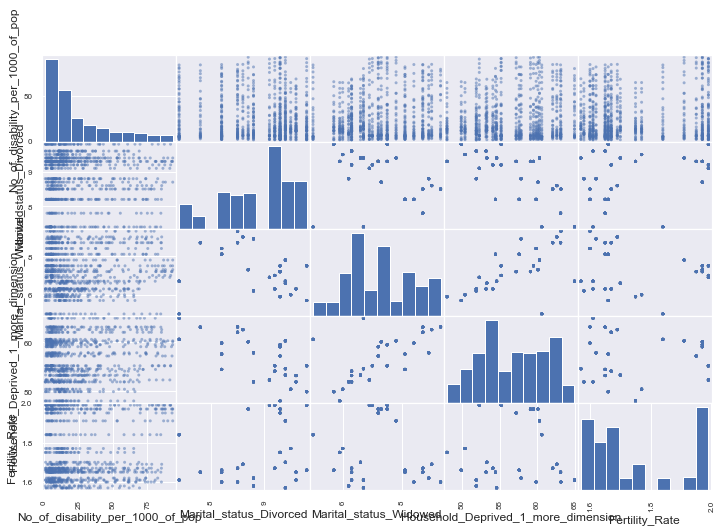

In [30]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
attributes = ["No_of_disability_per_1000_of_pop","Marital_status_Divorced","Marital_status_Widowed","Household_Deprived_1_more_dimension","Fertility_Rate"]
dummy = scatter_matrix(train_set[attributes], figsize=(12, 8))

## 5. Data Preprocessing

<b> 
First check if there are any missing or null values then perfom  cleaning on train set and then on test set
    <br>
    We will clean both the train and test sets however will only execute commands for test set and not explore to see the data in order to avoid snooping.


In [31]:
#sum and Sort all observations that have null data
train_set.isna().sum()[train_set.isna().sum() !=0].sort_values(ascending=False)

Series([], dtype: int64)

In [32]:
#validate data after dropping nulls
train_set.isna().sum()

Year                                   0
Region                                 0
Sex                                    0
Age                                    0
No_of_disability_per_1000_of_pop       0
LFE                                    0
Smoking                                0
Deaths                                 0
ASMR                                   0
GPs                                    0
Median_Income                          0
No_Of_Jobs                             0
Marital_status_single                  0
Marital_status_Married                 0
Marital_status_Seperated               0
Marital_status_Divorced                0
Marital_status_Widowed                 0
Household_Deprived_1_more_dimension    0
Fertility_Rate                         0
dtype: int64

<B>Since the data taken from census publications hence there are no missing or Nan values across the dataset

## 6. Feature Engineering

The target variable No_of_disability_per_1000_of_pop     is the outcome of feature engineering performed on the raw data using excel which was formulated using the Disability count and population.
No_of_disability_per_1000_of_pop  = Disability Count / Population


Similarly all other predictor variables such as LFE, Smoking,Death,ASMR etc were extracted using year,region and gender wise
lookup values from different ONS datasets 

In [33]:
# the number of instances belonging to each Year
train_set["Year"].value_counts()

2001    292
2021    287
2011    285
Name: Year, dtype: int64

In [34]:
# the number of instances belonging to each Region
train_set["Region"].value_counts()

South East                  102
West Midlands               100
London                       98
South West                   98
East Midlands                95
North West                   94
Yorkshire and The Humber     94
East of England              92
North East                   91
Name: Region, dtype: int64

In [35]:
# the number of instances belonging to each Region
train_set["Sex"].value_counts()

Male      436
Female    428
Name: Sex, dtype: int64

This helps us to understand if there is any unbalanced data against any category of dataset, 
Since there isnt any such unbalanced data hence we do not need to perform over or under sampling.

## 7. Data Transformation

<b>7.1 Handling unknowns by using imputation technique

The imputation technique is used when there are unknowns that must be handled rather than dropping the entries.
This is accomplished by the use of a univariate imputation technique in which the unknown values are replaced by the mean, median, or most frequent values.


The present dataset is derived from numerous census and survey datasets for each region and gender, therefore there are no unknowns that would necessitate imputation. 

<b>7.2 Creating Dummies

<b>Creating dummy variables for categorical variables using one hot encoding technique</b>
<br>
There are a lot of categorical variables with multiple categories under them and
so we need to create dummies by performing one hot encoding.<br>
This helps in regression analysis to represent subgroups 

In [36]:
#One hot encoding creates dummy variables with values 1 and 0

#Perform one hot encoding
one_hot_encoder = OneHotEncoder(drop="first", sparse=False,handle_unknown='ignore')

# categorical columns to alter
cat_cols = ["Year","Region", 
            "Sex","Age"]

# fit an encoder and transform the training set
cat_vals = train_set[cat_cols].to_numpy()
transformed = one_hot_encoder.fit_transform(cat_vals)

# Unique values of the category variables are used as the names of the new columns.
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)

# place the altered data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    train_set[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the trainset
train_set.head()

,Year,Region,Sex,Age,No_of_disability_per_1000_of_pop,LFE,Smoking,Deaths,ASMR,GPs,...,Age_50 to 54,Age_55 to 59,Age_60 to 64,Age_65 to 69,Age_70 to 74,Age_75 to 79,Age_80 to 84,Age_85 to 89,Age_90+,Age_Under 1
586,2011,East of England,Male,25 to 29,5.5,55.87,24.0,24394,570.4,646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,2021,East Midlands,Female,10 to 14,7.1,73.09,11.5,24577,892.1,575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,2011,South East,Male,30 to 34,6.0,51.07,27.2,19453,574.3,861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,2001,South West,Female,Under 1,1.7,81.74,25.6,54333,1046.2,553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
642,2011,South East,Female,5 to 9,2.6,79.12,23.8,22021,413.6,861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Verifying the dimension after applying one hot encoding
train_set.shape

(864, 49)

In [38]:
# transform the testing set using the encoder that is fitted on training set
cat_vals = test_set[cat_cols].to_numpy()
transformed = one_hot_encoder.transform(cat_vals)

# place the altered data as columns in the testset 
for i, new_col_name in enumerate(new_col_names):
    test_set[new_col_name] = transformed[:,i]
    

Once dummy variables are created we can drop the original features

In [39]:
#Drop the original categorical variables as dummy variables are created
#this will drop all the original categorical columns on the train and test set
train_set.drop(columns=cat_cols, inplace=True)
test_set.drop(columns=cat_cols, inplace=True)


In [40]:
#Verify the columns on the train dataset
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 586 to 855
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No_of_disability_per_1000_of_pop     864 non-null    float64
 1   LFE                                  864 non-null    float64
 2   Smoking                              864 non-null    float64
 3   Deaths                               864 non-null    int64  
 4   ASMR                                 864 non-null    float64
 5   GPs                                  864 non-null    int64  
 6   Median_Income                        864 non-null    int64  
 7   No_Of_Jobs                           864 non-null    int64  
 8   Marital_status_single                864 non-null    float64
 9   Marital_status_Married               864 non-null    float64
 10  Marital_status_Seperated             864 non-null    float64
 11  Marital_status_Divorced       

In [41]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 586 to 855
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No_of_disability_per_1000_of_pop     864 non-null    float64
 1   LFE                                  864 non-null    float64
 2   Smoking                              864 non-null    float64
 3   Deaths                               864 non-null    int64  
 4   ASMR                                 864 non-null    float64
 5   GPs                                  864 non-null    int64  
 6   Median_Income                        864 non-null    int64  
 7   No_Of_Jobs                           864 non-null    int64  
 8   Marital_status_single                864 non-null    float64
 9   Marital_status_Married               864 non-null    float64
 10  Marital_status_Seperated             864 non-null    float64
 11  Marital_status_Divorced       

## 8. Data Scaling

<b>Standardise/scale the independent variables to a range using standard scaler</b>
    <br>
Since our independent variables have different scales (Percentage and counts) , We need to standardise all the independent variables.
<br>It is also known as data normalisation.
<BR>It will scale all the variables to a range and enable better performance of the model algorithms

In [42]:
train_set.shape

(864, 45)

In [43]:
#Define an instance 
scaler = StandardScaler()


#Scale only the independent/predictor variables which have similar scale and so we will exclude our target variable while scaling
trainset_target = train_set["No_of_disability_per_1000_of_pop"].values
trainset_predictors = train_set.drop("No_of_disability_per_1000_of_pop", axis=1)

# Scale the data set and put it inside a dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
train_set = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# then put the non-scaled target variable back into the original dataset.
train_set['No_of_disability_per_1000_of_pop'] = trainset_target
train_set.head()
print(train_set.shape)


(864, 45)


In [44]:
#Perform the fitted scaler to transform on the test data

testset_target = test_set["No_of_disability_per_1000_of_pop"].values
testset_predictors = test_set.drop("No_of_disability_per_1000_of_pop", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
scaled_vals = scaler.fit_transform(testset_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in the dataframe
test_set['No_of_disability_per_1000_of_pop'] = testset_target

In [45]:
print(train_set.shape)
print(test_set.shape)

(864, 45)
(216, 45)


In [46]:
train_set.head()

,LFE,Smoking,Deaths,ASMR,GPs,Median_Income,No_Of_Jobs,Marital_status_single,Marital_status_Married,Marital_status_Seperated,...,Age_55 to 59,Age_60 to 64,Age_65 to 69,Age_70 to 74,Age_75 to 79,Age_80 to 84,Age_85 to 89,Age_90+,Age_Under 1,No_of_disability_per_1000_of_pop
0,0.609856,0.433674,-0.724784,-1.078561,-0.352575,1.088891,0.234396,-0.553913,1.664211,0.254933,...,-0.220326,-0.226042,-0.228856,-0.231643,-0.214487,-0.217423,-0.239849,-0.245199,-0.217423,5.5
1,1.294038,-1.577351,-0.714061,-0.176396,-0.642601,-0.243713,-0.413267,0.425007,0.407576,-0.588982,...,-0.220326,-0.226042,-0.228856,-0.231643,-0.214487,-0.217423,-0.239849,-0.245199,-0.217423,7.1
2,0.419143,0.948496,-1.014304,-1.067624,0.525672,1.373384,1.729968,-0.375927,1.448788,0.254933,...,-0.220326,-0.226042,-0.228856,-0.231643,-0.214487,-0.217423,-0.239849,-0.245199,-0.217423,6.0
3,1.637719,0.691085,1.029505,0.255757,-0.732468,-1.623605,-0.769952,-1.510584,-0.346406,-1.010939,...,-0.220326,-0.226042,-0.228856,-0.231643,-0.214487,-0.217423,-0.239849,-0.245199,4.599331,1.7
4,1.533621,0.401497,-0.863831,-1.518286,0.525672,-0.688775,1.473406,-0.375927,1.448788,0.254933,...,-0.220326,-0.226042,-0.228856,-0.231643,-0.214487,-0.217423,-0.239849,-0.245199,-0.217423,2.6


# Feature Selection

<b>Filter Method - Pearson's Correlation
<br><br>
Correlations enable us to understand which variables are correlated to the target variable
<br>
Checking correlation and dropping variables before creating dummies for categorical variables

In [47]:
#Using Pearson's correlation for variable correlation after data transformation 
#ranking the correlation coefficients from strongest to weakest
corr_matrix = train_set.corr(method='pearson')
corr_matrix['No_of_disability_per_1000_of_pop'].sort_values(ascending=False)

No_of_disability_per_1000_of_pop       1.000000
Age_90+                                0.543765
Age_85 to 89                           0.458900
Age_80 to 84                           0.315965
Age_75 to 79                           0.200547
Age_70 to 74                           0.144266
Household_Deprived_1_more_dimension    0.097415
Age_65 to 69                           0.095133
Marital_status_Widowed                 0.076725
Smoking                                0.070018
Age_60 to 64                           0.051504
Year_2011                              0.049290
Marital_status_Seperated               0.048004
Fertility_Rate                         0.038537
Region_North East                      0.031433
Region_Yorkshire and The Humber        0.030896
Region_North West                      0.023401
Region_West Midlands                   0.010299
Deaths                                 0.008357
Region_London                         -0.003859
Region_South West                     -0

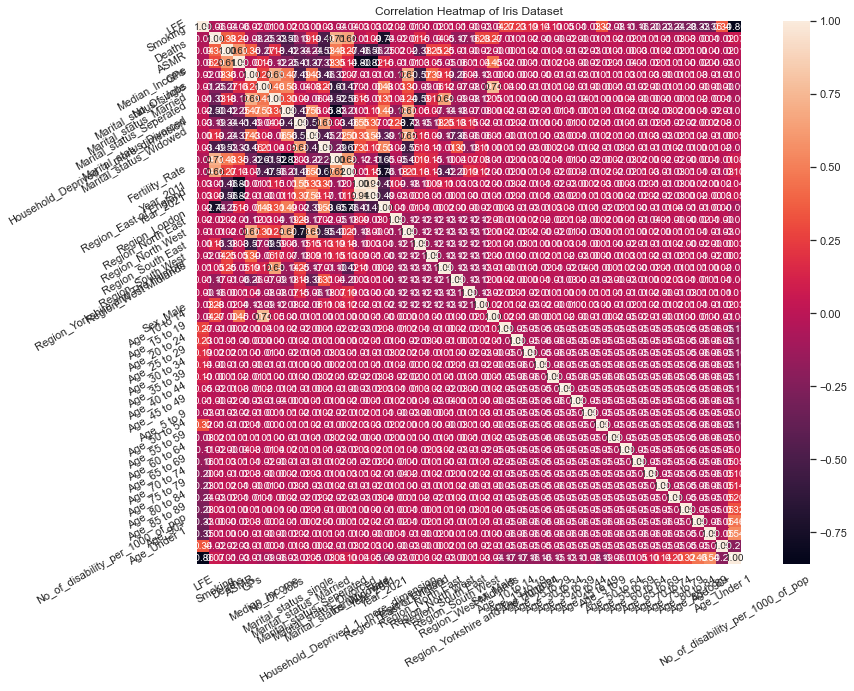

In [49]:

# Create correlation heatmap
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()  

In [50]:
def correlation(dataset, threshold):
    col_corr = set()      
    corr_matrix = dataset.corr(method='pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [55]:
corr_features = correlation(train_set, 0.6)
corr_features


{'ASMR',
 'Fertility_Rate',
 'Household_Deprived_1_more_dimension',
 'Marital_status_Divorced',
 'Marital_status_Widowed',
 'No_Of_Jobs',
 'No_of_disability_per_1000_of_pop',
 'Region_London',
 'Region_South East',
 'Sex_Male',
 'Year_2011',
 'Year_2021'}

So these are highly correlated and hence they would be eliminating the less correlated one's from the dataset Gps,Median_Income, Marital_status_Married,Marital_status_Seperated,Marital_status_single 

In [53]:
train_set.shape

(864, 45)

In [56]:
# removed less correlated features from train set
train_set.drop('GPs', axis=1, inplace=True)
train_set.drop('Median_Income', axis=1, inplace=True)
train_set.drop('Marital_status_Married', axis=1, inplace=True)
train_set.drop('Marital_status_Seperated', axis=1, inplace=True)
train_set.drop('Marital_status_single', axis=1, inplace=True)
train_set.drop('Deaths', axis=1, inplace=True)
train_set.drop('Smoking', axis=1, inplace=True)


# removed less correlated features from test set
test_set.drop('GPs', axis=1, inplace=True)
test_set.drop('Median_Income', axis=1, inplace=True)
test_set.drop('Marital_status_Married', axis=1, inplace=True)
test_set.drop('Marital_status_Seperated', axis=1, inplace=True)
test_set.drop('Marital_status_single', axis=1, inplace=True)
test_set.drop('Deaths', axis=1, inplace=True)
test_set.drop('Smoking', axis=1, inplace=True)

train_set.shape, test_set.shape

((864, 38), (216, 38))

## 9. Baseline Method

<b>Create separate arrays for predictors and target on train and test dataset in order to feed the model for training and then evaluating.
    <br>
    so training set and testing set will be split into 2 datasets X and y which will hold predictors and target respectively

In [58]:
# drop the predictor column for training set, but keep all others
Xtrain = train_set.drop("No_of_disability_per_1000_of_pop", axis=1)
#copy the target column 
ytrain = train_set["No_of_disability_per_1000_of_pop"].copy()

# drop the predictor column for testing set, but keep all others
Xtest = test_set.drop("No_of_disability_per_1000_of_pop", axis=1)
#copy the target column 
ytest = test_set["No_of_disability_per_1000_of_pop"].copy()

<b>Perform baseline model as this will form our basis to compare other model scores

We'll use a simple baseline: for all test instances, predict the median value seen in the training data:

In [59]:
median_No_of_disability_per_1000_of_pop = ytrain.median()
median_No_of_disability_per_1000_of_pop

14.5

Measure it in terms of RMSE:

In [60]:
from sklearn.metrics import mean_squared_error

# yhat will have the same number of rows as ytrain, 
# each cell will be filled with the same value, median_No_of_disability_per_1000_of_pop
yhat = np.full((ytrain.shape[0], 1), median_No_of_disability_per_1000_of_pop)

baseline_mse = mean_squared_error(ytrain, yhat)

# take square root
baseline_rmse = np.sqrt(baseline_mse)

baseline_rmse

25.817704277620557

The baseline RMSE is off by 25.817% on average.

In [61]:
#Create a function to display the RMSE scores:

def func_display_model_scores(scores):
    print("Scores:",scores)
    print("Accuracy:",scores.mean())
    print("Standard deviation:",scores.std())
    


## 10. Model Building

In this part, we will create five models, train them on the training set and compare their results before picking the best ones to evaluate on the test
set. We will use the following algorithms:

<b>10.1 Linear Regression

   We will build a linear regression model and test the RMSE and R-Square
  <br> To measure the regression accuracy of each model and compare each model against each other, we will use the Root Mean Squared Error(RMSE)

In [62]:
#initiate linear regression function
lin_reg = LinearRegression()

#Cross validation with 10 parts to get the avergae accuracy score
lin_reg_scores= cross_val_score(lin_reg,Xtrain,ytrain,scoring="neg_mean_squared_error",cv=10)

#With the cross validation , we have to take the opposite of the MSE to calculate the RMSE
rmse_lin_scores=np.sqrt(-lin_reg_scores)

#Call the function to display the scores
func_display_model_scores(rmse_lin_scores)



Scores: [5.67412064 6.64351242 5.57133733 5.87592257 5.00668154 5.7908185
 6.64056142 6.0848624  5.79567364 5.72049237]
Accuracy: 5.880398283524668
Standard deviation: 0.4630593452052867


RMSE of 5.9 is lower than the baseline which is a good sign of model being fit and accurate, now calculate the R-square

In [63]:
lin_reg.fit(Xtrain, ytrain)
lin_reg.score(Xtrain, ytrain)

0.9451972575269443

The R-square of 94 for the model is pretty good which indicates the model to have a good accuracy, so we will verify the Root Mean Square Error (RMSE) of the training set and then compare it with the baseline model

In [64]:
# make predictions
yhat = lin_reg.predict(Xtrain)

lin_mse = mean_squared_error(ytrain, yhat)

# take square root
lin_rmse = np.sqrt(lin_mse)

lin_rmse

5.5494912770758305

In [65]:
def plot_learning_curves(model, X, y):
    
    # create a train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=7)
    train_errors, val_errors, sizes = [], [], []
    
    # take different sizes of the training data, starting from 50s instance, with the step of 10
    for m in range(50, len(X_train), 10):
        
        # fit a model
        model.fit(X_train[:m], y_train[:m])
        
        # evaluate the model on both training and validation sets
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        # calculate RMSE and record the results
        train_rmse = np.sqrt(mean_squared_error(y_train_predict, y_train[:m]))
        val_rmse = np.sqrt(mean_squared_error(y_val_predict, y_val))
        
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
        sizes.append(m)
        
    # make a plot
    temp_df = pd.DataFrame({"training set size": sizes, 
                        "train": train_errors,
                        "val": val_errors})
    temp_df.plot(x="training set size", y=["train", "val"], kind="line", 
             figsize=(6, 4))

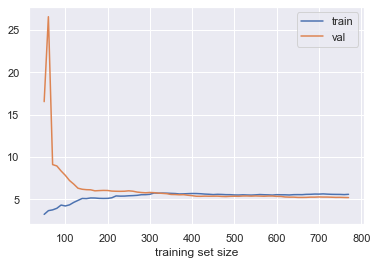

In [66]:
#Plot the learning curve
plot_learning_curves(lin_reg, Xtrain, ytrain)


With, linear regression, one can notice that in the beginning, at smaller sizes of training data, the model overfits
(the training set performance is mainly below 6, while performance on validation is over 25 at very small sizes of training data;
 As the size of the training data increases, the validation set performance stabilizes very quickly and stays on the same level.
 The training set performance also plateaus at some point and does not change much any more.
 This indicates that with more training data the performance on the validation set improves.

The rmse is much better than the baseline , however we will visualize the predictions with the real values for 50 instances.
<br>
ytrain represents the current values  and yhat represents predicted values

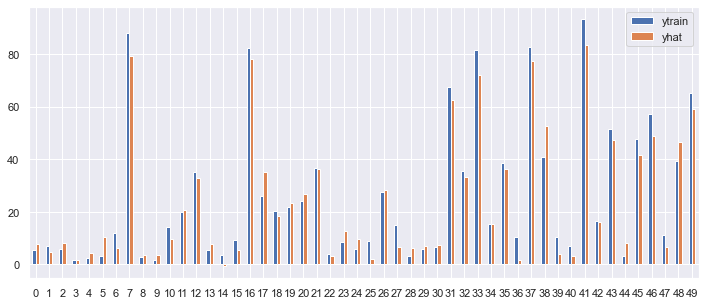

In [67]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)




We see that the predictions are quite reasonable, except for a few cases where the prediction either overshot or undershot the true value by a large amount.

We can retrieve specific instances where the absolute difference between the prediction and the true value was particularly big, say, over 70% of the true value:

In [68]:
cond_idx =np.abs(ytrain[:50] - yhat[:50])/ytrain[:50] > 0.7

In [69]:
cond_idx.sum()

7

We will create a scatter plot to visualise the predicted values versus their current values.

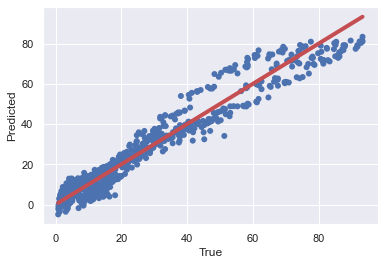

In [70]:
fig, ax = plt.subplots()
ax.scatter(ytrain, yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

The values seem to be more or less correctly predicted as they (yhat) follow the red line

<b>Most of the time, it seems like the predictions are accurate, so "Pickle" (save) the model so as not to re-train it

In [71]:
# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    #stores the model and can be reloaded and ran , so not required to retrain it
dump(lin_reg, 'models/lin_reg.joblib')

['models/lin_reg.joblib']

<b>10.2 Decision Tree

We will now proceed with decision tree model and understand the model accuracy.
<br>GridSearch will be used to tweak the decision tree hyperparameters. It will allow us to select the best hyperparameters for the algorithm from a set of possibilities.

In [72]:
#Using GridSearch and applying cross validations we will be able to search the best hyperparameters for the decision trees
# and thus cross-validation. 
#Applying and comparing several  hyperparameters combinations.

dtree_param_grid= {'min_samples_split': [2, 3, 4, 5], 'max_depth': [2, 4, 6, 8, None]}
#n_estimators: Number of trees in random forest
#max_depth: Maximum number of levels in tree
# min_samples_split: Minimum number of samples required to split a node

Dtree_reg = DecisionTreeRegressor()
# start a timer
dt_start=time.time()

#Cross-validation with 10 splits
# we also want it to return the train score later
dtree_grid_search = GridSearchCV(Dtree_reg, dtree_param_grid, cv=10,
scoring='neg_mean_squared_error', return_train_score=True)

#We fit the training data to the best model (and thus estimators)
dtree_grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, None],
                         'min_samples_split': [2, 3, 4, 5]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
# details on the best model for the decision tree algorithm
best_dtree=dtree_grid_search.best_estimator_
best_dtree

DecisionTreeRegressor(min_samples_split=3)

The best decision tree model has a min_samples_split=5.
<br>
Now we will use -validation to find the average accuracy score for this model.

In [74]:
dtree_cv_scores= cross_val_score(best_dtree, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
dtree_cv_rmse_scores = np.sqrt(-dtree_cv_scores)
func_display_model_scores(dtree_cv_rmse_scores)

Scores: [2.2302711  2.24316971 2.80103634 2.42477633 1.62984519 2.65829658
 2.29975353 2.0056461  1.9484117  2.18767026]
Accuracy: 2.2428876833683837
Standard deviation: 0.3228684984226353


The RMSE is 2.6 which is even better (lower) than the Linear regression model which was at 5.93 and baseline at 25.8

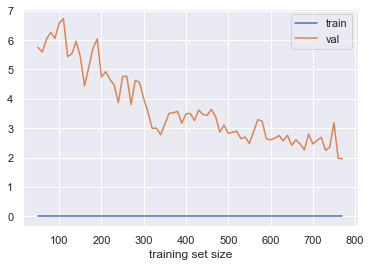

In [75]:
#Plot the learning curve
plot_learning_curves(Dtree_reg, Xtrain, ytrain)

With, decision tree,the model fits the validation set poorly and one can notice that the model <b>overfits</b> indicating that the model was unable to learn from the training data.However it is seen that the validation data is declining, indicative that with more training data, cross validation error will keep coming down.


In [76]:
# training and validation RMSE
dtree_val_scores = dtree_grid_search.cv_results_["mean_test_score"]
dtree_train_scores = dtree_grid_search.cv_results_["mean_train_score"]
dtree_params = dtree_grid_search.cv_results_["params"]
for dtree_val_score, dtree_train_score, dtree_param in zip(dtree_val_scores, dtree_train_scores, dtree_params):
    print(np.sqrt(-dtree_val_score), np.sqrt(-dtree_train_score), dtree_param)

8.257662918492649 7.646405760583238 {'max_depth': 2, 'min_samples_split': 2}
8.257662918492649 7.646405760583238 {'max_depth': 2, 'min_samples_split': 3}
8.257662918492649 7.646405760583238 {'max_depth': 2, 'min_samples_split': 4}
8.257662918492649 7.646405760583238 {'max_depth': 2, 'min_samples_split': 5}
4.687997059417648 4.109119169855294 {'max_depth': 4, 'min_samples_split': 2}
4.687997059417649 4.109119169855294 {'max_depth': 4, 'min_samples_split': 3}
4.687997059417647 4.109119169855294 {'max_depth': 4, 'min_samples_split': 4}
4.687997059417648 4.109119169855294 {'max_depth': 4, 'min_samples_split': 5}
2.8567029999692846 2.055861039564322 {'max_depth': 6, 'min_samples_split': 2}
2.8504169684725293 2.0560312462274966 {'max_depth': 6, 'min_samples_split': 3}
2.838814319395575 2.0579311174714516 {'max_depth': 6, 'min_samples_split': 4}
2.9035263003611274 2.0618812722953863 {'max_depth': 6, 'min_samples_split': 5}
2.455155819704874 0.8568205783326127 {'max_depth': 8, 'min_samples_spl

The model has performed well on the validation set though a little higher in comparision with the training set

In [77]:
dtree_rmse_score=np.sqrt(-dtree_grid_search.best_score_)
print(f'The best Decision Trees model has a RMSE of: {dtree_rmse_score}')

The best Decision Trees model has a RMSE of: 2.340800004382813


In [78]:
# let's predict on the training set
dtree_yhat= best_dtree.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
dt_duration = time.time() - dt_start
print(f'The Decision Trees model took {dt_duration:.3f} seconds')

The Decision Trees model took 4.495 seconds


So far,the rmse is much better than the baseline and linear regression  , however we will visualize the predictions with the real values for 50 instances.
<br>
ytrain represents the current values  and dtree_yhat represents predicted values

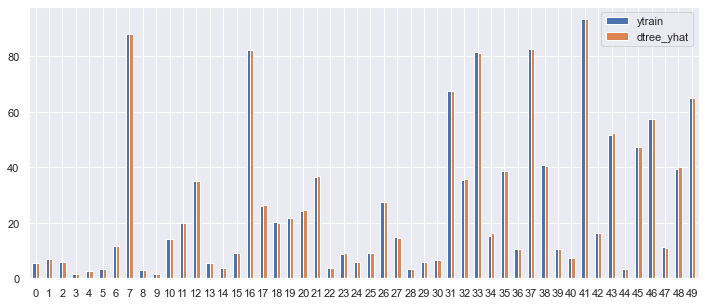

In [79]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "dtree_yhat": dtree_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

We will create a scatter plot to visualise the predicted values versus their current values.

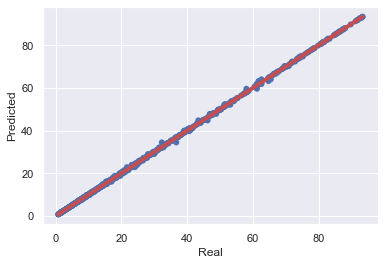

In [80]:
fig, ax = plt.subplots()
ax.scatter(ytrain, dtree_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

The values follow more closely on the red line in comparison to the linear regression model and seem to fit well.

In [81]:
# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    #stores the model and can be reloaded and ran , so not required to retrain it
dump(best_dtree, 'models/dtree_reg.joblib')

['models/dtree_reg.joblib']

<b>10.3 Random Forest

This time, we want to use Random Grid Search to get the optimal value for the hyperparameter. 
<br>It operates similarly to GridSearch, but we must also specify the number of random combinations to try.

In [82]:
# specify the hyperparameters and their values
# n_estimators = number of decision trees used in the random forest
# max depth : maximum number of levels in the trees
# min_samples_Split = Minimum number of samples required to split a node

param_grid = {'n_estimators': [3, 10, 20], 'max_depth': [2, 4, 6, 8, None]}
Rforest_reg = RandomForestRegressor()
# start a new timer
rf_start=time.time()
# we'll use 10-fold cross-validation with 10 random combinations to try
# we also want to get the train score for later
rf_random_grid_search = RandomizedSearchCV(Rforest_reg, param_grid, cv=10, n_iter=10, 
                                           scoring='neg_mean_squared_error', 
                                           random_state=8, return_train_score=True)
# fit the estimator on the training set
rf_random_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 4, 6, 8, None],
                                        'n_estimators': [3, 10, 20]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [83]:
# the best random forest model
best_rforest = rf_random_grid_search.best_estimator_
best_rforest

RandomForestRegressor(n_estimators=20)

The best model has 20 estimators .
<BR>
 We will now use cross-validation to find the average accuracy score for this model.

In [84]:
rf_cv_scores= cross_val_score(best_rforest, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)
func_display_model_scores(rf_cv_rmse_scores)

Scores: [1.5607684  2.14171284 1.85740078 2.01719718 1.80252286 2.43349883
 1.72024234 2.63780537 1.44664739 1.80534462]
Accuracy: 1.942314061011222
Standard deviation: 0.3544614027588648


The RMSE is 1.86 which is even better (lower) than the decision tree , linear regression , baseline models which were at 2.62 , 5.93 and  25.8 respectively


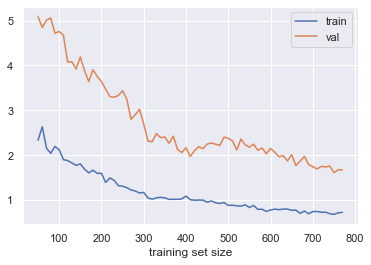

In [85]:
#Plot the learning curve
plot_learning_curves(Rforest_reg, Xtrain, ytrain)

With Random forest,the model fits the validation set poorly and one can notice that the model <b>overfits</b> indicating that the model was unable to learn from the training data.However it is seen that the validation data is declining, indicative that with more training data, cross validation error will keep coming down.

In [86]:
# training and validation of RMSE

val_scores = rf_random_grid_search.cv_results_["mean_test_score"]
train_scores = rf_random_grid_search.cv_results_["mean_train_score"]
params = rf_random_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

2.8130464987780264 1.9133955508758589 {'n_estimators': 3, 'max_depth': 6}
1.9780257500911582 0.940796083728584 {'n_estimators': 20, 'max_depth': 8}
7.444710369134049 6.908794432576467 {'n_estimators': 20, 'max_depth': 2}
2.363441777294496 1.2353737732797656 {'n_estimators': 3, 'max_depth': None}
1.9572118170411628 0.86399956520961 {'n_estimators': 10, 'max_depth': None}
2.1309138520205697 1.0437766240892576 {'n_estimators': 10, 'max_depth': 8}
2.3934576899448787 1.6472759725343686 {'n_estimators': 10, 'max_depth': 6}
7.803475754747031 7.1775225289264935 {'n_estimators': 3, 'max_depth': 2}
1.9126266247721282 0.8021521636458699 {'n_estimators': 20, 'max_depth': None}
2.26625395603181 1.5498185044414223 {'n_estimators': 20, 'max_depth': 6}


The model has performed well on the validation set in comparision with the training set

In [87]:
# The best model's RMSE

rf_rmse_score=np.sqrt(-rf_random_grid_search.best_score_)
print(f'The best Random Forest model has a RMSE of: {rf_rmse_score}')

The best Random Forest model has a RMSE of: 1.9126266247721282


In [88]:
# let's predict on the training set
rforest_yhat = best_rforest.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
rf_duration = time.time() - rf_start
print(f'The Random Forest model took {rf_duration:.3f} seconds')

The Random Forest model took 57.192 seconds


So far,the rmse is much better than the baseline , linear regression and decision tree , however we will visualize the predictions with the real values for 50 instances.
<br>
ytrain represents the current values  and rforest_yhat represents predicted values

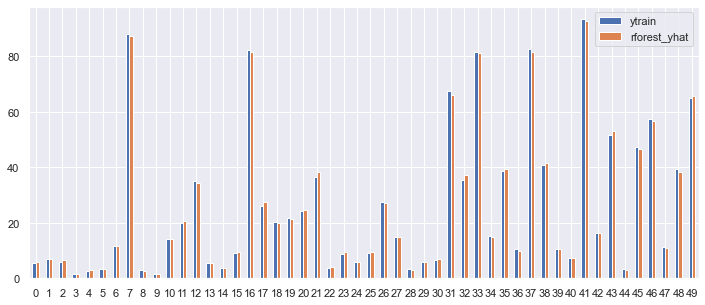

In [89]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "rforest_yhat": rforest_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

We will create a scatter plot to visualise the predicted values versus their current values.

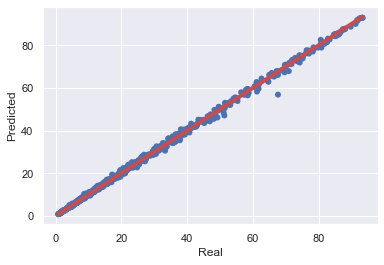

In [90]:
fig, ax = plt.subplots()
ax.scatter(ytrain, rforest_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In comparison to the other models shown above, the values follow the red line more closely and appear to match nicely.

In [91]:
# save the model
dump(best_rforest, 'models/rforest_reg.joblib')

['models/rforest_reg.joblib']

<b>10.4 Support Vector Regression

GridSearch will be used to modify the hyperparameters of the Support Vector Regressor.

In [92]:
#Apply hyperparameter values
svr_param_grid = [
{'C': [1.0, 10, 100,10000],
'gamma': ["scale", "auto", 0.01, 0.1, 1, 3, 5, 10]
},
]
svr = SVR(kernel="rbf")
# start a new timer
svr_start = time.time()
#10 fold cross_validation and access to train score for later
sv_grid_search = GridSearchCV(svr, svr_param_grid, cv=10, scoring='neg_mean_squared_error',
return_train_score=True)
# fit the best model and hyperparameters to the training set
sv_grid_search.fit(Xtrain, ytrain)


GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [1.0, 10, 100, 10000],
                          'gamma': ['scale', 'auto', 0.01, 0.1, 1, 3, 5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [93]:
#Best svr model
best_svr = sv_grid_search.best_estimator_
best_svr

SVR(C=10000, gamma=0.01)

The best model has C=10000 and gamma= 0.01.<br>Now we will use the cross-validation to find the average accuracy score for this model

In [94]:
sv_cv_scores= cross_val_score(best_svr, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
sv_cv_rmse_scores = np.sqrt(-sv_cv_scores)
func_display_model_scores(sv_cv_rmse_scores)

Scores: [1.02884955 1.07210724 0.97045115 0.98577046 0.77890463 0.7842356
 1.2398211  1.12702218 0.75386193 0.66895811]
Accuracy: 0.9409981959944901
Standard deviation: 0.17650896617737136


The RMSE is 1.12 which is even better (lower) than the Random forest, decision tree , linear regression , baseline models which were at 1.9, 2.62 , 5.93 and 25.8 respectively

In [95]:
#training and validation RMSE
val_scores = sv_grid_search.cv_results_["mean_test_score"]
train_scores = sv_grid_search.cv_results_["mean_train_score"]
params = sv_grid_search.cv_results_["params"]
for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

16.41032609608208 15.96173927286647 {'C': 1.0, 'gamma': 'scale'}
16.41033806426117 15.96169656494929 {'C': 1.0, 'gamma': 'auto'}
16.703027753541694 16.442286738700695 {'C': 1.0, 'gamma': 0.01}
23.776863090804454 23.119516334070646 {'C': 1.0, 'gamma': 0.1}
25.71942317124452 25.03969782053274 {'C': 1.0, 'gamma': 1}
25.72358693754359 25.044031737435894 {'C': 1.0, 'gamma': 3}
25.723587465941925 25.044032294264184 {'C': 1.0, 'gamma': 5}
25.72358746603219 25.044032291146216 {'C': 1.0, 'gamma': 10}
2.427957741351128 1.3276659627579714 {'C': 10, 'gamma': 'scale'}
2.4279242829118077 1.3276941688570054 {'C': 10, 'gamma': 'auto'}
3.093388644150947 2.4164506912639103 {'C': 10, 'gamma': 0.01}
11.961188714327868 7.654786385033106 {'C': 10, 'gamma': 0.1}
25.134349047769312 19.160834191119996 {'C': 10, 'gamma': 1}
25.1774172612567 19.19888452449424 {'C': 10, 'gamma': 3}
25.177422978914706 19.198889686223357 {'C': 10, 'gamma': 5}
25.1774229799197 19.198889653635373 {'C': 10, 'gamma': 10}
1.600183341092

The performance on training and validation is almost similar which is 1.081 and 1.09 and close enough

In [96]:
# Best model RMSE
sv_rmse_score=np.sqrt(-sv_grid_search.best_score_)
print(f'The best SVR model has a RMSE of: {sv_rmse_score}')

The best SVR model has a RMSE of: 0.957409536199577


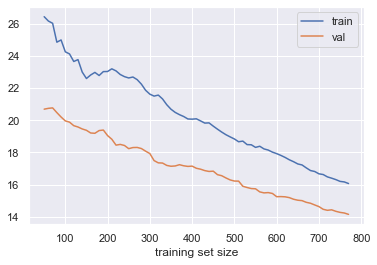

In [97]:
#Plot the learning curve
plot_learning_curves(svr, Xtrain, ytrain)

With, Support Vector Regressor,the model fits the validation set poorly and one can notice that the model <b>underfits</b> indicating that the model was unable to learn from the training data.

In [98]:
# let's predict on the training set
svr_yhat = best_svr.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
svr_duration = time.time() - svr_start
print(f'The SVR model took {svr_duration:.3f} seconds')

The SVR model took 107.705 seconds


With every model the  rmse has become much better than all the above trained models , however we will visualize the predictions with the real values for 50 instances.
<br>
ytrain represents the current values  and svr_yhat represents predicted values

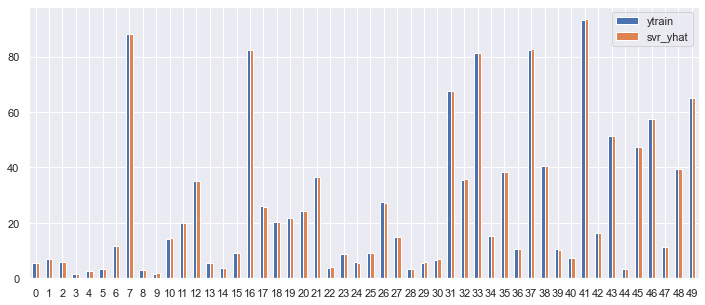

In [99]:
# create a temporary dataframe containing two columns
svr_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "svr_yhat": svr_yhat[:50]})
# plot the dataframe
svr_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

We will create a scatter plot to visualise the predicted values versus their current values.

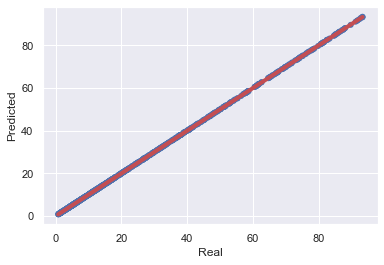

In [100]:
fig, ax = plt.subplots()
ax.scatter(ytrain, svr_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>The values seem to fit perfectly on the red line indicating to be so far the BEST model

In [101]:
# Save the model
dump(best_svr, 'models/svr_reg.joblib')

['models/svr_reg.joblib']

<b>10.5 Adaboost Regressor

Using Random Grid Search, we tweak the hyperparameter for the Adaboost Regressor.

In [102]:
adb_reg=AdaBoostRegressor()
#Apply hyper parameter values

adb_param_grid = {'n_estimators': [3, 10, 20, 50], 'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
1],
'loss' : ['linear', 'square', 'exponential']}

adb_reg=AdaBoostRegressor(random_state=8)
#start a new timer
adb_start = time.time()

# we'll use 10-fold cross-validation and want to have access to the train score
adb_random_grid_search = RandomizedSearchCV(adb_reg, adb_param_grid, cv=10, n_iter=10,
scoring='neg_mean_squared_error', random_state=8, return_train_score=True)

#fit the best model and hyperparameters to the training dataset
adb_random_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=8),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.25, 0.5, 0.75, 1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [3, 10, 20, 50]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [103]:
# the best model
best_adbr = adb_random_grid_search.best_estimator_
best_adbr

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=20,
                  random_state=8)

The best Adaboost Regressor model has 20 estimators, 8 for random state, a learning rate of 1 and loss=square<BR>
Now we will use cross-validation to find the average accuracy score for this model.

In [104]:
adb_cv_scores= cross_val_score(best_adbr, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
adb_cv_rmse_scores = np.sqrt(-adb_cv_scores)
func_display_model_scores(adb_cv_rmse_scores)

Scores: [3.96177719 4.64963809 4.15335701 4.46911425 3.69786852 4.54132724
 3.34301213 4.73220582 4.40837785 3.66358884]
Accuracy: 4.162026693735613
Standard deviation: 0.45128402087063985


The RMSE is 4.21 which is more than the support vector (1.14), Random forest (1.9) and decision tree (2.62) models
however lower than the linear regression(5.93) and baseline (25.8) models 

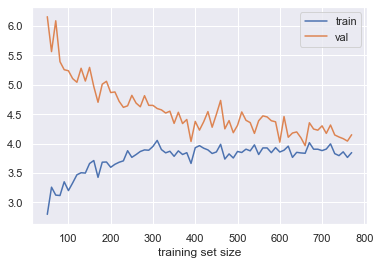

In [105]:
#Plot the learning curve
plot_learning_curves(adb_reg, Xtrain, ytrain)

With adaboost regressor,initially the model doesntlearning but with increase in the training set, the model is seen to be learning as the validation data is declining, indicating that with more training data, cross validation error will keep coming down.

In [106]:
# training and validation RMSE
adb_val_scores = adb_random_grid_search.cv_results_["mean_test_score"]
adb_train_scores = adb_random_grid_search.cv_results_["mean_train_score"]
adb_params = adb_random_grid_search.cv_results_["params"]
for adb_val_score, adb_train_score, adb_param in zip(adb_val_scores, adb_train_scores, adb_params):
    print(np.sqrt(-adb_val_score), np.sqrt(-adb_train_score), param)

5.8691870434553115 5.4569706615221545 {'C': 10000, 'gamma': 10}
5.411715971177702 4.929155944151155 {'C': 10000, 'gamma': 10}
5.2549266412296 4.768809972340356 {'C': 10000, 'gamma': 10}
4.9886876889103995 4.671252633163643 {'C': 10000, 'gamma': 10}
5.880868576582686 5.30505816720729 {'C': 10000, 'gamma': 10}
4.445458710081125 3.967915413832956 {'C': 10000, 'gamma': 10}
4.186421319798208 3.871742629298807 {'C': 10000, 'gamma': 10}
5.844770055360822 5.101351760547946 {'C': 10000, 'gamma': 10}
5.3148052845960105 4.961227230756342 {'C': 10000, 'gamma': 10}
5.523155107893998 5.001090901614755 {'C': 10000, 'gamma': 10}


The performance on training and validation is almost similar 

In [107]:
#RMSE score
adb_rmse_score = np.sqrt(-adb_random_grid_search.best_score_)
print(f'The best Adaboost model has a RMSE of: {adb_rmse_score}')

The best Adaboost model has a RMSE of: 4.186421319798208


In [108]:
# let's predict on the training set
adbr_yhat = best_adbr.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
adb_duration = time.time() - adb_start
print(f'The Adaboost model took {adb_duration:.3f} seconds')

The Adaboost model took 16.096 seconds


We will visualize the predictions with the real values for 50 instances.
ytrain represents the current values and adbr_yhat represents predicted values

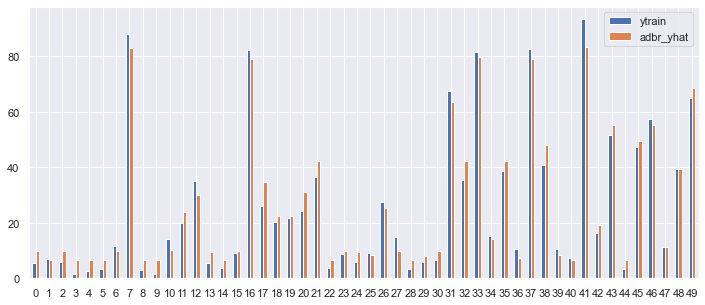

In [109]:
# create a temporary dataframe containing two columns
adb_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "adbr_yhat": adbr_yhat[:50]})
# plot the dataframe
adb_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

We will create a scatter plot to visualise the predicted values versus their current values.

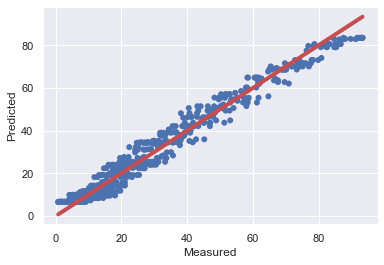

In [110]:
fig, ax = plt.subplots()
ax.scatter(ytrain, adbr_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [111]:
#Save the model
dump(best_adbr, 'models/adbr_reg.joblib')

['models/adbr_reg.joblib']

<b>10.6 Lasso Regressor

To find the optimal value of alpha, we use scikit learns lasso linear model with iterative fitting along a regularization path (LassoCV). The best model is selected by cross-validation.

In [112]:

lasso_start=time.time()
#check the cross validation
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, random_state=0)
lasso_cv.fit(Xtrain, ytrain)

LassoCV(cv=10, max_iter=100000, random_state=0)

In [113]:
# get the optimal value of alpha parameter
alpha = lasso_cv.alpha_
alpha

0.07150093779628619

In [114]:
lasso = Lasso(alpha = alpha ,random_state=5)
lasso.fit(Xtrain, ytrain)

Lasso(alpha=0.07150093779628619, random_state=5)

In [115]:
# grid search hyperparameters for lasso regression


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

# define grid search for hyperparameter tuning
lasso_grid_search = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1,
                                 return_train_score=True)



In [116]:
# fit the estimator on the training set
lasso_grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Lasso(alpha=0.07150093779628619, random_state=5),
             n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37,....41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [117]:
# the best estimator model
best_lasso = lasso_grid_search.best_estimator_
best_lasso

Lasso(alpha=0.02, random_state=5)

In [118]:
lasso_cv_scores= cross_val_score(best_lasso, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
lasso_cv_rmse_scores = np.sqrt(-lasso_cv_scores)
func_display_model_scores(lasso_cv_rmse_scores)

Scores: [5.63644968 6.48640936 5.58570708 5.85773862 4.98359772 5.8003557
 6.59898221 6.05805148 5.66148703 5.64182944]
Accuracy: 5.831060832394122
Standard deviation: 0.4419495088474257


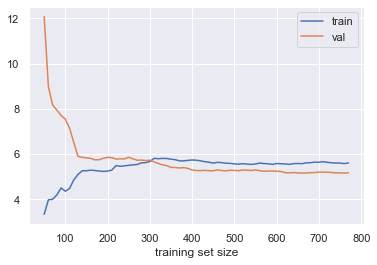

In [119]:
#Plot the learning curve
plot_learning_curves(best_lasso, Xtrain, ytrain)

In [120]:
#training and validation of RMSE
val_scores = lasso_grid_search.cv_results_["mean_test_score"]
train_scores = lasso_grid_search.cv_results_["mean_train_score"]
params = lasso_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

2.138991228360664 2.0891331231866874 {'alpha': 0.0}
2.1332045664466883 2.088601989375562 {'alpha': 0.01}
2.1323435071407366 2.089842639867694 {'alpha': 0.02}
2.1324462567225324 2.090920192702457 {'alpha': 0.03}
2.132942894996181 2.0918703711056477 {'alpha': 0.04}
2.1334592480239034 2.0928453992236213 {'alpha': 0.05}
2.1341162708936565 2.0939106767231177 {'alpha': 0.06}
2.1348227398621438 2.0950320490136525 {'alpha': 0.07}
2.135599744532694 2.096201896704595 {'alpha': 0.08}
2.136448725003284 2.0974392835173945 {'alpha': 0.09}
2.137408455028499 2.0987066394375047 {'alpha': 0.1}
2.1384749117646784 2.1000224036367467 {'alpha': 0.11}
2.139634558004822 2.1013727236706305 {'alpha': 0.12}
2.1408763633680405 2.102766278887866 {'alpha': 0.13}
2.142122311397306 2.104202998060095 {'alpha': 0.14}
2.1433998234040876 2.105683043661504 {'alpha': 0.15}
2.144753710707364 2.107202343849317 {'alpha': 0.16}
2.146146308122448 2.1087669427594715 {'alpha': 0.17}
2.14762907506764 2.110373213726147 {'alpha': 0.

In [121]:
# The best model's RMSE

lasso_rmse_score=np.sqrt(-lasso_grid_search.best_score_)
print(f'The best Lasso Regressor model has a RMSE of: {lasso_rmse_score}')

The best Lasso Regressor model has a RMSE of: 2.1323435071407366


In [122]:
# let's predict on the training set
lasso_yhat = best_lasso.predict(Xtrain)
lasso_duration = time.time() - lasso_start

print(f'The Lasso model took {lasso_duration:.3f} seconds')

The Lasso model took 20.885 seconds


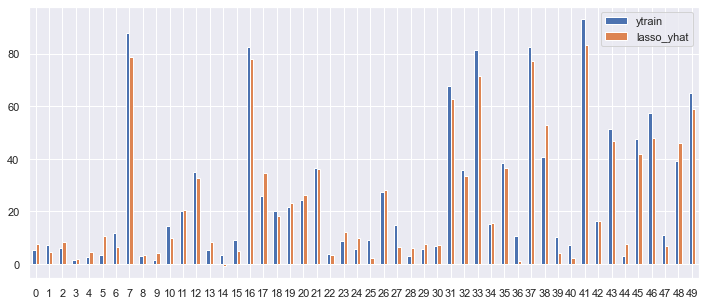

In [123]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "lasso_yhat": lasso_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

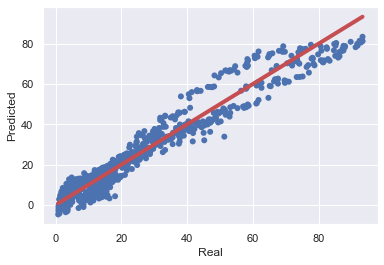

In [124]:
fig, ax = plt.subplots()
ax.scatter(ytrain, lasso_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [125]:
# save the model
dump(best_lasso, 'models/lasso_reg.joblib')

['models/lasso_reg.joblib']

<b>10.7 Ridge Regressor Model

In [126]:
ridge_start=time.time()

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(Xtrain, ytrain)

RidgeCV(alphas=array([4.71961398, 4.47142978, 3.21966798, 3.74295435, 5.20957184,
       1.52707698, 9.54480351, 2.07561862, 1.17725219, 1.16452911,
       5.52254053, 1.8554184 , 7.09185896, 2.13333875, 3.57249601,
       2.11406624, 8.23486309, 6.06526664, 0.40275403, 2.81023215,
       0.21344637, 3.85880704, 6.98695633, 3.65911953, 1.87370825,
       0.04478128, 5.0907117 , 7.77949901, 1.93003249, 0.12879977,
       2.11401695, 2.78871416, 2.48853972, 4.99165044, 7.19241021,
       3.05145277, 1.35318718, 4.72539591, 3.55751269, 5.65966912,
       4.15109135, 4.70960311, 2.79138906, 5.89435523, 1.88647133,
       0.15724658, 0.16503985, 1.45642098, 4.81162015, 9.25966448]),
        cv=10)

In [127]:
alpha = ridge_cv.alpha_
alpha

9.544803512858728

In [128]:
ridge = Ridge(alpha = alpha,random_state=5)
ridge.fit(Xtrain, ytrain)

Ridge(alpha=9.544803512858728, random_state=5)

In [129]:
scores = cross_val_score(ridge, Xtrain, ytrain, scoring='neg_mean_squared_error', 
                         cv=10)

ridge_cv_rmse_scores = np.sqrt(-scores)
func_display_model_scores(ridge_cv_rmse_scores.round(decimals=3))

Scores: [5.67  6.578 5.621 5.857 4.996 5.822 6.529 6.101 5.674 5.617]
Accuracy: 5.846500000000001
Standard deviation: 0.4420586499549578


In [130]:
# grid search hyperparameters for ridge regression


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

# define grid search for hyperparameter tuning
ridge_grid_search = GridSearchCV(ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1,
                                 return_train_score=True)


In [131]:
# fit the estimator on the training set
ridge_grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Ridge(alpha=9.544803512858728, random_state=5),
             n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.....41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [132]:
# the best estimator model
best_ridge = ridge_grid_search.best_estimator_
best_ridge

Ridge(alpha=0.99, random_state=5)

In [133]:
ridge_cv_scores= cross_val_score(best_ridge, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
ridge_cv_rmse_scores = np.sqrt(-ridge_cv_scores)
func_display_model_scores(ridge_cv_rmse_scores)

Scores: [5.67596282 6.5346897  5.5882248  5.8806134  5.0007612  5.80959108
 6.64267484 6.04815512 5.71650124 5.7124138 ]
Accuracy: 5.860958799890524
Standard deviation: 0.44660290772915884


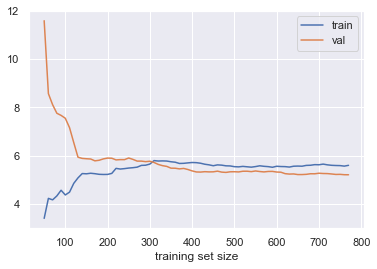

In [134]:
#Plot the learning curve
plot_learning_curves(best_ridge, Xtrain, ytrain)

In [135]:
#training and validation of RMSE
val_scores = ridge_grid_search.cv_results_["mean_test_score"]
train_scores = ridge_grid_search.cv_results_["mean_train_score"]
params = ridge_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

2.138079832111628 2.086687937286365 {'alpha': 0.0}
2.137969682699272 2.086752681916136 {'alpha': 0.01}
2.137882835516187 2.0868207915731958 {'alpha': 0.02}
2.1378227010236412 2.0868907156265983 {'alpha': 0.03}
2.1377716686160584 2.0869564834456598 {'alpha': 0.04}
2.1377282077591317 2.087019077723565 {'alpha': 0.05}
2.1376889987147036 2.0870788571522394 {'alpha': 0.06}
2.1376543050634043 2.087136950883365 {'alpha': 0.07}
2.1376232071993915 2.087192251333428 {'alpha': 0.08}
2.1375949302837194 2.08724521287423 {'alpha': 0.09}
2.137568210518697 2.087295321702122 {'alpha': 0.1}
2.137542872492804 2.0873426709277987 {'alpha': 0.11}
2.137518768998839 2.0873874983943597 {'alpha': 0.12}
2.137496645419948 2.0874305459381923 {'alpha': 0.13}
2.1374758537859866 2.087471553046739 {'alpha': 0.14}
2.1374601705259133 2.0875118834945074 {'alpha': 0.15}
2.137451369898807 2.0875510865661013 {'alpha': 0.16}
2.13744266864996 2.087588390770696 {'alpha': 0.17}
2.137434159224019 2.0876237225712777 {'alpha': 0.1

In [136]:
# The best model's RMSE

ridge_rmse_score=np.sqrt(-ridge_grid_search.best_score_)
print(f'The best Ridge Regressor model has a RMSE of: {ridge_rmse_score}')

The best Ridge Regressor model has a RMSE of: 2.137216462606654


In [137]:
# let's predict on the training set
ridge_yhat = best_ridge.predict(Xtrain)
ridge_duration = time.time() - ridge_start

print(f'The Ridge model took {ridge_duration:.3f} seconds')

The Ridge model took 18.797 seconds


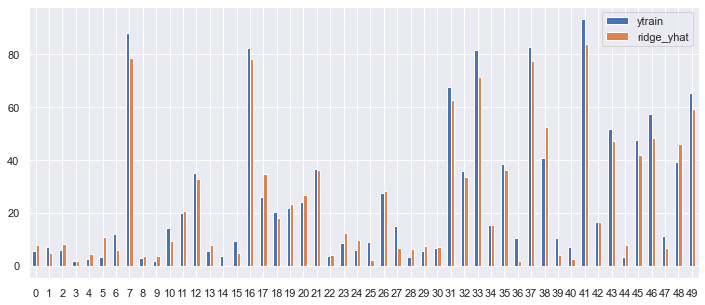

In [138]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "ridge_yhat": ridge_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

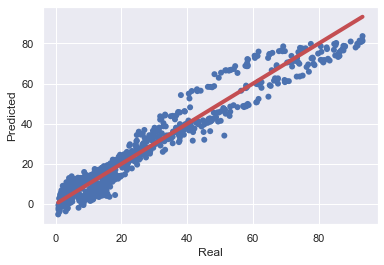

In [139]:
fig, ax = plt.subplots()
ax.scatter(ytrain, ridge_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [140]:
# save the model
dump(best_ridge, 'models/ridge_reg.joblib')

['models/ridge_reg.joblib']

<b>10.8 XGBoost Regressor

In [141]:
param_grid = {'n_estimators': [1000, 1500],'learning_rate': [0.01, 0.03,0.05] , 'max_depth': [3,6,9]}

xgb_reg = XGBRegressor()
# start a new timer
xgb_start=time.time()

xgb_grid_search = RandomizedSearchCV(xgb_reg, param_grid, cv=10, n_iter=10, 
                                           scoring='neg_mean_squared_error', 
                                           random_state=8, return_train_score=True)
# fit the estimator on the training set
xgb_grid_search.fit(Xtrain, ytrain)



RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [1000, 1500]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [142]:
# the best random forest model
best_xgb = xgb_grid_search.best_estimator_
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [143]:
xgb_cv_scores= cross_val_score(best_xgb, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
xgb_cv_rmse_scores = np.sqrt(-xgb_cv_scores)
func_display_model_scores(xgb_cv_rmse_scores)

Scores: [0.99068181 1.23549223 0.99787388 1.06038546 1.02055354 1.34896211
 1.09238898 1.25903083 0.96969957 1.03884027]
Accuracy: 1.1013908695438877
Standard deviation: 0.12515975511452732


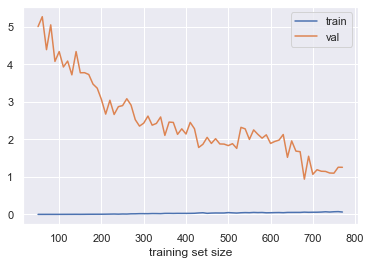

In [144]:
#Plot the learning curve
plot_learning_curves(xgb_reg, Xtrain, ytrain)

In [145]:
#training and validation of RMSE

val_scores = xgb_grid_search.cv_results_["mean_test_score"]
train_scores = xgb_grid_search.cv_results_["mean_train_score"]
params = xgb_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)


1.1729590697366834 0.021636938211135943 {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.05}
1.248801998961767 0.5952271724872802 {'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.03}
1.2227217587099994 0.0027278272913743846 {'n_estimators': 1000, 'max_depth': 9, 'learning_rate': 0.05}
1.2295334430180236 0.0028037841332112096 {'n_estimators': 1500, 'max_depth': 9, 'learning_rate': 0.03}
1.2132194024076932 0.04814678096995255 {'n_estimators': 1000, 'max_depth': 9, 'learning_rate': 0.01}
1.132223015237273 0.43007365869390374 {'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.03}
1.2025297320059316 0.2190789270000403 {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01}
1.1084795044631948 0.39014438717592104 {'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05}
1.5360975934827705 0.9529903242679308 {'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.01}
1.1717210992470881 0.00697873636109421 {'n_estimators': 1500, 'max_depth': 6, 'learning_rat

In [146]:
# The best model's RMSE
xgb_rmse_scores=np.sqrt(-xgb_grid_search.best_score_)
print(f'The best XGBoost Regressor model has a RMSE of: {xgb_rmse_scores}')


The best XGBoost Regressor model has a RMSE of: 1.1084795044631948


In [147]:
# let's predict on the training set
xgb_yhat = best_xgb.predict(Xtrain)
xgb_duration = time.time() - xgb_start

print(f'The Gradient Boost model took {xgb_duration:.3f} seconds')

The Gradient Boost model took 291.384 seconds


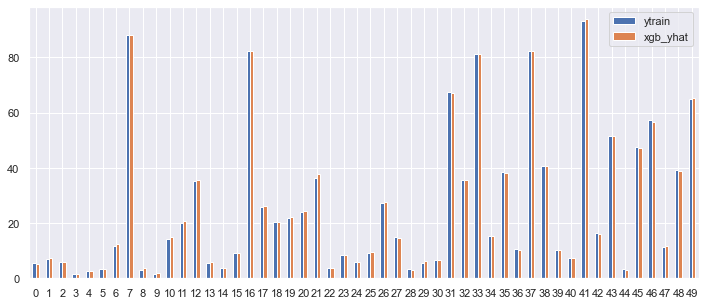

In [148]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "xgb_yhat": xgb_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

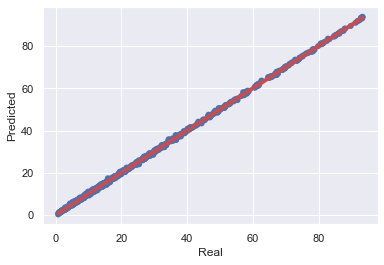

In [149]:
fig, ax = plt.subplots()
ax.scatter(ytrain, xgb_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [150]:
# save the model
dump(best_xgb, 'models/xgb_reg.joblib')

['models/xgb_reg.joblib']

<b>10.9 Gradient Boost Regressor

In [151]:
param_grid = {'n_estimators': [300,500,1000, 1500],'learning_rate': [0.01, 0.03,0.05] , 'max_depth': [3,6,9]}

gbr_reg = GradientBoostingRegressor()
# start a new timer
gbr_start=time.time()

gbr_grid_search = RandomizedSearchCV(gbr_reg, param_grid, cv=10, n_iter=10, 
                                           scoring='neg_mean_squared_error', 
                                           random_state=8, return_train_score=True)
# fit the estimator on the training set
gbr_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [300, 500, 1000, 1500]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [152]:
# the best random forest model
best_gbr = gbr_grid_search.best_estimator_
best_gbr

GradientBoostingRegressor(learning_rate=0.05, n_estimators=500)

In [153]:
gbr_cv_scores= cross_val_score(best_gbr, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
gbr_cv_rmse_scores = np.sqrt(-gbr_cv_scores)
func_display_model_scores(gbr_cv_rmse_scores)


Scores: [1.22805014 1.34966937 1.19129367 1.32078458 1.13734317 1.56766491
 1.33136963 1.44891335 1.15882688 1.19278364]
Accuracy: 1.292669933397168
Standard deviation: 0.13116469778054288


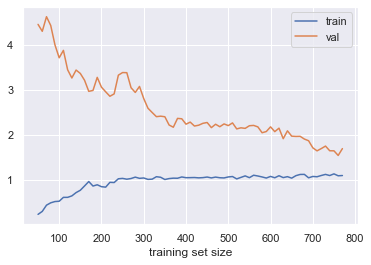

In [154]:
#Plot the learning curve
plot_learning_curves(gbr_reg, Xtrain, ytrain)


In [155]:
#training and validation of RMSE

val_scores = gbr_grid_search.cv_results_["mean_test_score"]
train_scores = gbr_grid_search.cv_results_["mean_train_score"]
params = gbr_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)




3.013651930984918 2.5815817365777844 {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}
1.5168231169694102 0.9093827319464036 {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05}
1.3024832021808028 0.6289009175885026 {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05}
1.8832089741221387 0.0011523136129530432 {'n_estimators': 1500, 'max_depth': 9, 'learning_rate': 0.01}
1.3736102232876417 0.08500741776932738 {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05}
2.0777444418697724 1.5677466795166812 {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}
1.3362040031114897 0.02886530080575313 {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.03}
1.8877910893153313 4.884561761863065e-05 {'n_estimators': 1000, 'max_depth': 9, 'learning_rate': 0.03}
1.3612669667927297 0.08627293047603245 {'n_estimators': 1500, 'max_depth': 6, 'learning_rate': 0.01}
1.877931883129154 5.5205517602484835e-06 {'n_estimators': 1500, 'max_depth': 9, 'learning_rate': 

In [156]:
# The best model's RMSE

gbr_rmse_score=np.sqrt(-gbr_grid_search.best_score_)
print(f'The best Gradient Boost regressor model has a RMSE of: {gbr_rmse_score}')


The best Gradient Boost regressor model has a RMSE of: 1.3024832021808028


In [157]:
# let's predict on the training set
gbr_yhat = best_gbr.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
gbr_duration = time.time() - gbr_start
print(f'The Gradient Boost Regressor model took {gbr_duration:.3f} seconds')


The Gradient Boost Regressor model took 440.378 seconds


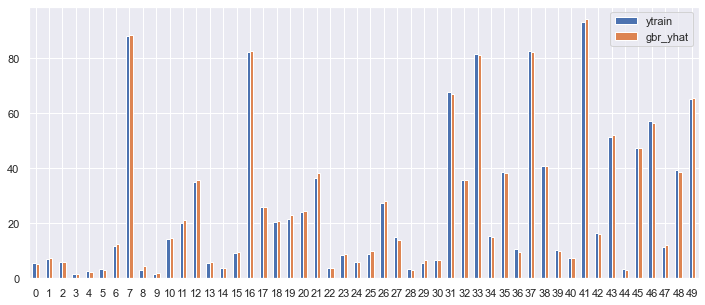

In [158]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "gbr_yhat": gbr_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)


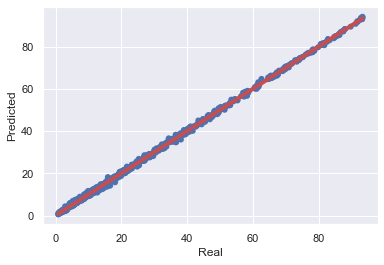

In [159]:
fig, ax = plt.subplots()
ax.scatter(ytrain, gbr_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [160]:
# save the model
dump(best_gbr, 'models/gbr_reg.joblib')

['models/gbr_reg.joblib']

<b>10.10 Stochastic Gradient Descent (SGD) Regressor

In [161]:
sgd_reg = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }

# start a new timer
sgd_start=time.time()

sgd_grid_search = GridSearchCV(sgd_reg, parameters, cv=10, verbose=1,  
                        scoring = 'neg_mean_squared_error',  return_train_score=True)

# fit the estimator on the training set
sgd_grid_search.fit(Xtrain, ytrain)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=SGDRegressor(),
             param_grid={'alpha': [1e-05], 'epsilon': [0.01],
                         'fit_intercept': [True], 'max_iter': [10000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [162]:
# the best random forest model
best_sgd = sgd_grid_search.best_estimator_
best_sgd

SGDRegressor(alpha=1e-05, epsilon=0.01, max_iter=10000)

In [163]:
sgd_cv_scores= cross_val_score(best_sgd, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
sgd_cv_rmse_scores = np.sqrt(-sgd_cv_scores)
func_display_model_scores(sgd_cv_rmse_scores)

Scores: [5.66717834 6.52946026 5.57293201 5.8457659  4.95534675 5.81325865
 6.60814541 6.05482935 5.69583529 5.662433  ]
Accuracy: 5.840518496906348
Standard deviation: 0.4525944797734603


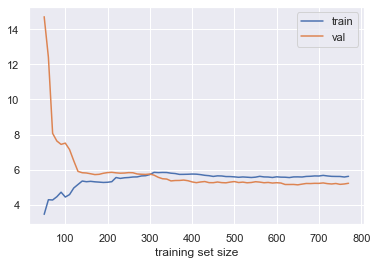

In [164]:
#Plot the learning curve
plot_learning_curves(sgd_reg, Xtrain, ytrain)

In [165]:
#training and validation of RMSE

val_scores = sgd_grid_search.cv_results_["mean_test_score"]
train_scores = sgd_grid_search.cv_results_["mean_train_score"]
params = sgd_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)


5.87759792441667 5.5463438440044 {'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000}


In [166]:
# The best model's RMSE

sgd_rmse_score=np.sqrt(-sgd_grid_search.best_score_)
print(f'The best Stochastic Gradient Descent regressor model has a RMSE of: {sgd_rmse_score}')


The best Stochastic Gradient Descent regressor model has a RMSE of: 5.87759792441667


In [167]:
# let's predict on the training set
sgd_yhat = best_sgd.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
sgd_duration = time.time() - sgd_start
print(f'The Stochastic Gradient Descent  Regressor model took {sgd_duration:.3f} seconds')

The Stochastic Gradient Descent  Regressor model took 1.614 seconds


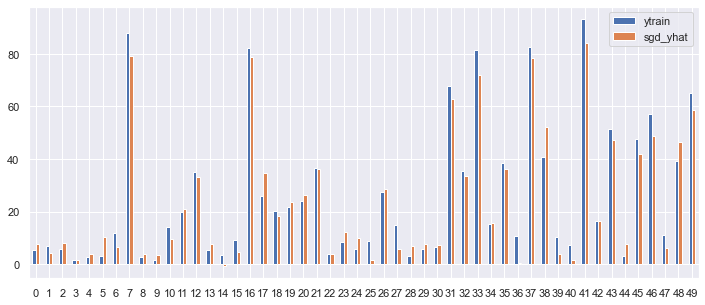

In [168]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "sgd_yhat": sgd_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)


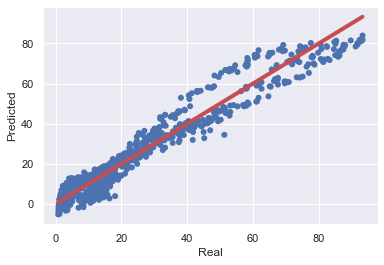

In [169]:
fig, ax = plt.subplots()
ax.scatter(ytrain, sgd_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [170]:
# save the model
dump(best_sgd, 'models/sgd_reg.joblib')

['models/sgd_reg.joblib']

<b>10.11 Comparing the models

<b>Comparing in terms of speed of execution of the models


In [171]:
print(f'Decision Trees: {dt_duration:.3f} seconds')
print(f'Random Forest: {rf_duration:.3f} seconds')
print(f'Support Vector Machine Regressor: {svr_duration:.3f} seconds')
print(f'Adaboost: {adb_duration:.3f} seconds')
print(f'Lasso: {lasso_duration:.3f} seconds')
print(f'Ridge: {ridge_duration:.3f} seconds')
print(f'XGBoost: {xgb_duration:.3f} seconds')
print(f'Gradient Boost: {gbr_duration:.3f} seconds')
print(f'Stochastic Gradient Descent : {sgd_duration:.3f} seconds')

Decision Trees: 4.495 seconds
Random Forest: 57.192 seconds
Support Vector Machine Regressor: 107.705 seconds
Adaboost: 16.096 seconds
Lasso: 20.885 seconds
Ridge: 18.797 seconds
XGBoost: 291.384 seconds
Gradient Boost: 440.378 seconds
Stochastic Gradient Descent : 1.614 seconds


In comparison of the time taken to execute the models, Decision Tree  was the fastest whereas Gradient Boost was the slowest of all

<b>Comparing in terms of their cross-validation scores

In [172]:
print('Linear Regression')
func_display_model_scores(rmse_lin_scores)
print('')
print('Decision Trees')
func_display_model_scores(dtree_cv_rmse_scores)
print('')
print('Random Forest')
func_display_model_scores(rf_cv_rmse_scores)
print('')
print('Support Vector Regression')
func_display_model_scores(sv_cv_rmse_scores)
print('')
print('AdaBoost Regressor')
func_display_model_scores(adb_cv_rmse_scores)
print('')
print('Lasso Regressor')
func_display_model_scores(lasso_cv_rmse_scores)
print('')
print('Ridge Regressor')
func_display_model_scores(ridge_cv_rmse_scores)
print('')
print('XGB Regressor')
func_display_model_scores(xgb_cv_rmse_scores)
print('')
print('Gradient Boost Regressor')
func_display_model_scores(gbr_cv_rmse_scores)
print('')
print('Stochastic Gradient Descent Regressor')
func_display_model_scores(sgd_cv_rmse_scores)

Linear Regression
Scores: [5.67412064 6.64351242 5.57133733 5.87592257 5.00668154 5.7908185
 6.64056142 6.0848624  5.79567364 5.72049237]
Accuracy: 5.880398283524668
Standard deviation: 0.4630593452052867

Decision Trees
Scores: [2.2302711  2.24316971 2.80103634 2.42477633 1.62984519 2.65829658
 2.29975353 2.0056461  1.9484117  2.18767026]
Accuracy: 2.2428876833683837
Standard deviation: 0.3228684984226353

Random Forest
Scores: [1.5607684  2.14171284 1.85740078 2.01719718 1.80252286 2.43349883
 1.72024234 2.63780537 1.44664739 1.80534462]
Accuracy: 1.942314061011222
Standard deviation: 0.3544614027588648

Support Vector Regression
Scores: [1.02884955 1.07210724 0.97045115 0.98577046 0.77890463 0.7842356
 1.2398211  1.12702218 0.75386193 0.66895811]
Accuracy: 0.9409981959944901
Standard deviation: 0.17650896617737136

AdaBoost Regressor
Scores: [3.96177719 4.64963809 4.15335701 4.46911425 3.69786852 4.54132724
 3.34301213 4.73220582 4.40837785 3.66358884]
Accuracy: 4.162026693735613
St

Looking at the cross validation , Support Vector Regression model has the best accuracy followed by XGB Regressor
whereas Linear regression model has the worst accuracy followed by Ridge Regressor model.
<br>
<br>
Next we will compare the RMSE of each model against the baseline.

In [173]:
RMSE = {
    'Baseline ' : [baseline_rmse],
    'Linear Regression' : [rmse_lin_scores.mean()],
    'Decision Trees' : [dtree_rmse_score],
    'Random Forest' : [rf_rmse_score],
    'Support Vector Regression' : [sv_rmse_score],
    'AdaBoost Regressor' : [adb_rmse_score],
    'Lasso Regressor' : [lasso_rmse_score],
    'Ridge Regressor' : [ridge_rmse_score],
    'XGBoost Regressor' : [xgb_rmse_scores],
    'Gradient Boost Regressor' : [gbr_rmse_score],
    'Stochastic Gradient Descent Regressor' : [sgd_rmse_score]
    
}

scores_df = pd.DataFrame(RMSE).transpose()
scores_df.columns=['RMSE']
scores_df["Vs Baseline"] = 100*(baseline_rmse - scores_df["RMSE"] )/baseline_rmse
scores_df

,RMSE,Vs Baseline
Baseline,25.817704,0.000000
Linear Regression,5.880398,77.223388
Decision Trees,2.340800,90.933353
Random Forest,1.912627,92.591802
Support Vector Regression,0.957410,96.291655
AdaBoost Regressor,4.186421,83.784688
Lasso Regressor,2.132344,91.740770
Ridge Regressor,2.137216,91.721896
XGBoost Regressor,1.108480,95.706514
Gradient Boost Regressor,1.302483,94.955077


The best model seems to be <b>Support Vector Regression</b> model followed by <b>XGBoost</b>

## 11. Model Evaluation on test data

We will evaluate the models on the test data

In [174]:
#Load the models
lin_reg = load("models/lin_reg.joblib")
best_dtree = load("models/dtree_reg.joblib")
best_rforest = load("models/rforest_reg.joblib")
best_svr=load("models/svr_reg.joblib")
best_adbr=load("models/adbr_reg.joblib")
best_lasso=load("models/lasso_reg.joblib")
best_ridge=load("models/ridge_reg.joblib")
best_xgb=load("models/xgb_reg.joblib")
best_gbr=load("models/gbr_reg.joblib")
best_sgd=load("models/sgd_reg.joblib")

<b>11.1 Linear Regression on test data

In [175]:
#Predict the Support Vector Regression Model using test dataset
lin_yhat_test = lin_reg.predict(Xtest)
lin_test_rmse = np.sqrt(mean_squared_error(ytest,lin_yhat_test))
print(f'Linear Regression Test RMSE: {lin_test_rmse}')

Linear Regression Test RMSE: 9.227645130461285


In [176]:
#Defining MAPE function to estimate the error value in the predictions
#use numpy.abs() function to find the absolute value of the differences
def func_MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [177]:
LR_MAPE= func_MAPE(ytest,lin_yhat_test)
print("MAPE: ",LR_MAPE)

MAPE:  51.35879005230096


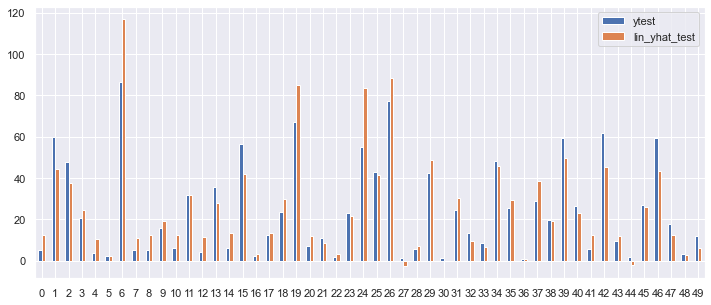

In [178]:
# create a temporary dataframe containing two columns
lin_df_tmp = pd.DataFrame({"ytest": ytest[:50], "lin_yhat_test": lin_yhat_test[:50]})
# plot the dataframe
lin_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

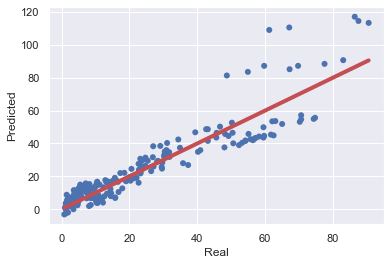

In [179]:
fig, ax = plt.subplots()
ax.scatter(ytest, lin_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.2 Decision tree on test data

In [180]:
#Predict the Random Forest Model using test dataset
dtree_yhat_test = best_dtree.predict(Xtest)
dtree_test_rmse = np.sqrt(mean_squared_error(ytest,dtree_yhat_test))
print(f'Decision Tree Test RMSE: {dtree_test_rmse}')

Decision Tree Test RMSE: 2.29745733043841


In [181]:
DTree_MAPE= func_MAPE(ytest,dtree_yhat_test)
print("MAPE: ",DTree_MAPE)

MAPE:  8.89966687975127


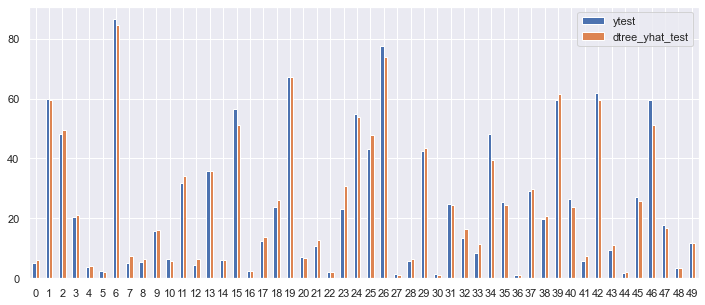

In [182]:
# create a temporary dataframe containing two columns
dtree_df_tmp = pd.DataFrame({"ytest": ytest[:50], "dtree_yhat_test": dtree_yhat_test[:50]})
# plot the dataframe
dtree_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

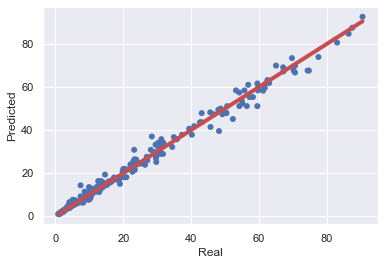

In [183]:
fig, ax = plt.subplots()
ax.scatter(ytest, dtree_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.3 Random Forest on test data

In [184]:
#Predict the Random Forest Model using test dataset
rf_yhat_test = best_rforest.predict(Xtest)
rf_test_rmse = np.sqrt(mean_squared_error(ytest,rf_yhat_test))
print(f'Random Forest Test RMSE: {rf_test_rmse}')

Random Forest Test RMSE: 1.9036301213441875


In [185]:
Rf_MAPE= func_MAPE(ytest,rf_yhat_test)
print("MAPE: ",Rf_MAPE)

MAPE:  7.582032808861829


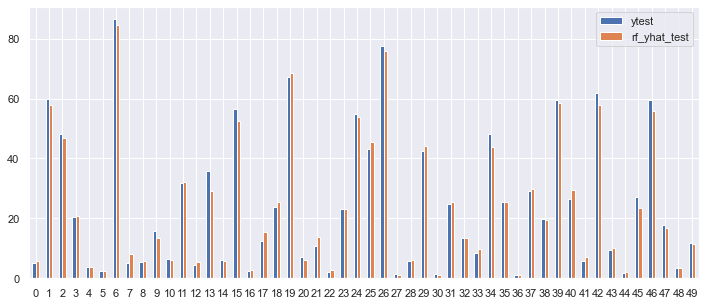

In [186]:
# create a temporary dataframe containing two columns
rf_df_tmp = pd.DataFrame({"ytest": ytest[:50], "rf_yhat_test": rf_yhat_test[:50]})
# plot the dataframe
rf_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

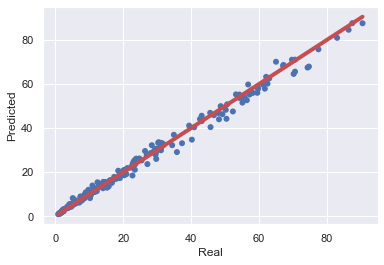

In [187]:
fig, ax = plt.subplots()
ax.scatter(ytest, rf_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.4 Support Vector Regression on test data

In [188]:
#Predict the Support Vector Regression Model using test dataset
svr_yhat_test = best_svr.predict(Xtest)
svr_test_rmse = np.sqrt(mean_squared_error(ytest,svr_yhat_test))
print(f'Support Vector Test RMSE: {svr_test_rmse}')

Support Vector Test RMSE: 2.825707427482317


In [189]:
SVR_MAPE= func_MAPE(ytest,svr_yhat_test)
print("MAPE: ",SVR_MAPE)

MAPE:  13.187808084176577


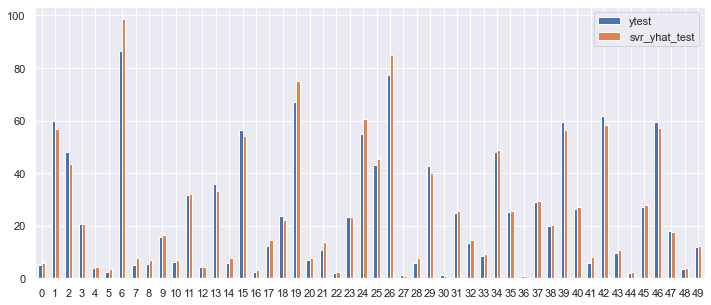

In [190]:
# create a temporary dataframe containing two columns
svr_df_tmp = pd.DataFrame({"ytest": ytest[:50], "svr_yhat_test": svr_yhat_test[:50]})
# plot the dataframe
svr_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

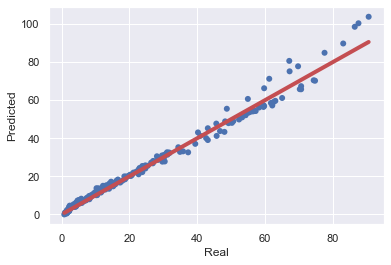

In [191]:
fig, ax = plt.subplots()
ax.scatter(ytest, svr_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.5 AdaBoost Regressor on test data

In [192]:
#Predict the AdaBoost Regressor Model using test dataset
adb_yhat_test = best_adbr.predict(Xtest)
adb_test_rmse = np.sqrt(mean_squared_error(ytest,adb_yhat_test))
print(f'AdaBoost Regressor Test RMSE: {adb_test_rmse}')

AdaBoost Regressor Test RMSE: 4.570725698675795


In [193]:
adb_MAPE= func_MAPE(ytest,adb_yhat_test)
print("MAPE: ",adb_MAPE)

MAPE:  56.19954094872479


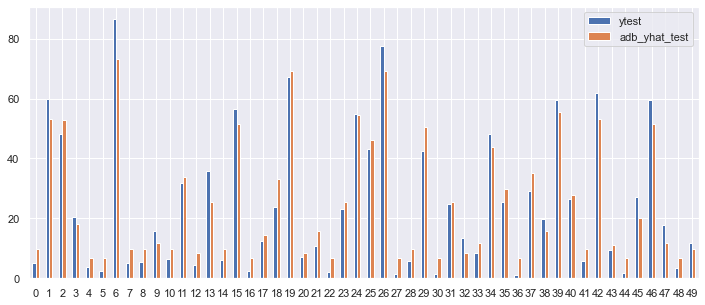

In [194]:
# create a temporary dataframe containing two columns
adb_df_tmp = pd.DataFrame({"ytest": ytest[:50], "adb_yhat_test": adb_yhat_test[:50]})
# plot the dataframe
adb_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

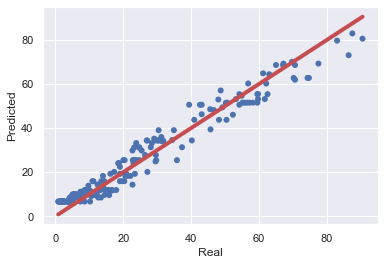

In [195]:
fig, ax = plt.subplots()
ax.scatter(ytest, adb_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.6 Lasso Regression on test data

In [196]:
#Predict the Lasso Regressor Model using test dataset
lasso_yhat_test = best_lasso.predict(Xtest)
lasso_test_rmse = np.sqrt(mean_squared_error(ytest,lasso_yhat_test))
print(f'Lasso Regressor Test RMSE: {lasso_test_rmse}')

Lasso Regressor Test RMSE: 7.143396809544211


In [197]:
lasso_MAPE= func_MAPE(ytest,lasso_yhat_test)
print("MAPE: ",lasso_MAPE)

MAPE:  47.95770822012402


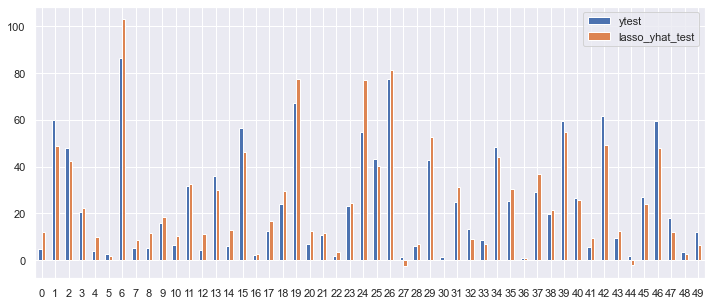

In [198]:
# create a temporary dataframe containing two columns
lasso_df_tmp = pd.DataFrame({"ytest": ytest[:50], "lasso_yhat_test": lasso_yhat_test[:50]})
# plot the dataframe
lasso_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

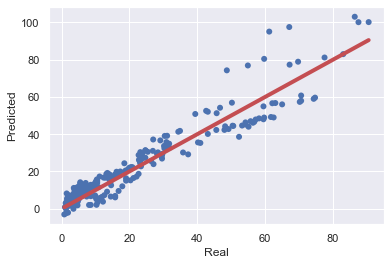

In [199]:
fig, ax = plt.subplots()
ax.scatter(ytest, lasso_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.7 Ridge Regression on test data

In [200]:
#Predict the Ridge Regressor Model using test dataset
ridge_yhat_test = best_ridge.predict(Xtest)
ridge_test_rmse = np.sqrt(mean_squared_error(ytest,ridge_yhat_test))
print(f'Ridge Regressor Test RMSE: {ridge_test_rmse}')

Ridge Regressor Test RMSE: 7.339474702896755


In [201]:
ridge_MAPE= func_MAPE(ytest,ridge_yhat_test)
print("MAPE: ",ridge_MAPE)

MAPE:  48.71881687930905


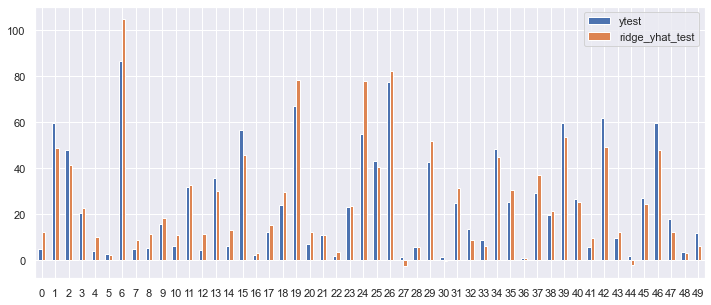

In [202]:
# create a temporary dataframe containing two columns
ridge_df_tmp = pd.DataFrame({"ytest": ytest[:50], "ridge_yhat_test": ridge_yhat_test[:50]})
# plot the dataframe
ridge_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

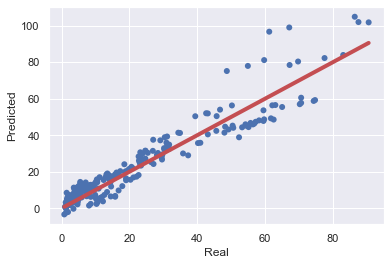

In [203]:
fig, ax = plt.subplots()
ax.scatter(ytest, ridge_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.8 XGBoost Regression on test data

In [204]:
#Predict the XGBoost Regressor Model using test dataset
xgb_yhat_test = best_xgb.predict(Xtest)
xgb_test_rmse = np.sqrt(mean_squared_error(ytest,xgb_yhat_test))
print(f'XGBoost Regressor Test RMSE: {xgb_test_rmse}')

XGBoost Regressor Test RMSE: 1.5677032668776727


In [205]:
xgb_MAPE= func_MAPE(ytest,xgb_yhat_test)
print("MAPE: ",xgb_MAPE)

MAPE:  7.788540199689802


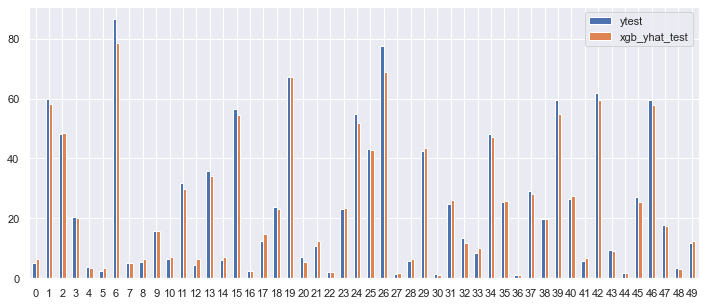

In [206]:
# create a temporary dataframe containing two columns
xgb_df_tmp = pd.DataFrame({"ytest": ytest[:50], "xgb_yhat_test": xgb_yhat_test[:50]})
# plot the dataframe
xgb_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

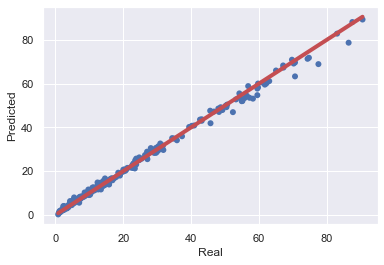

In [207]:
fig, ax = plt.subplots()
ax.scatter(ytest, xgb_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.9 Gradient Boost Regressor on test data

In [208]:
#Predict the Gradient Descent Regressor Model using test dataset
gbr_yhat_test = best_gbr.predict(Xtest)
gbr_test_rmse = np.sqrt(mean_squared_error(ytest,gbr_yhat_test))
print(f'Gradient Boost Regressor Test RMSE: {gbr_test_rmse}')

Gradient Boost Regressor Test RMSE: 1.7021181190119823


In [209]:
gbr_MAPE= func_MAPE(ytest,gbr_yhat_test)
print("MAPE: ",gbr_MAPE)

MAPE:  9.775144310881712


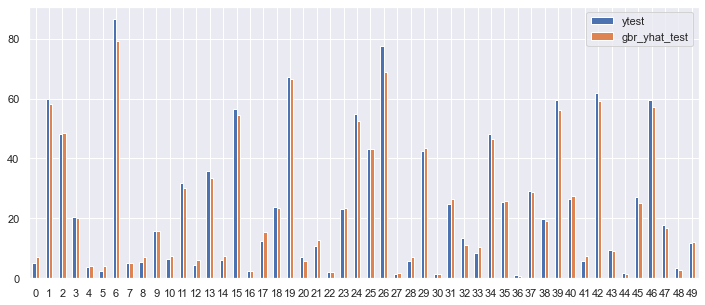

In [210]:
# create a temporary dataframe containing two columns
gbr_df_tmp = pd.DataFrame({"ytest": ytest[:50], "gbr_yhat_test": gbr_yhat_test[:50]})
# plot the dataframe
gbr_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

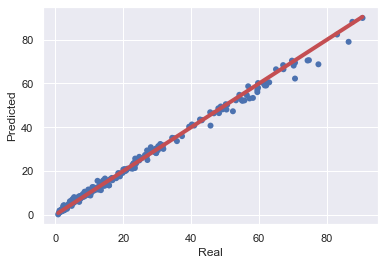

In [211]:
fig, ax = plt.subplots()
ax.scatter(ytest, gbr_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.10 Stochastic Gradient Descent Regressor on test data

In [212]:
#Predict the Gradient Descent Regressor Model using test dataset
sgd_yhat_test = best_sgd.predict(Xtest)
sgd_test_rmse = np.sqrt(mean_squared_error(ytest,sgd_yhat_test))
print(f'Stochastic Gradient Descent Regressor Test RMSE: {sgd_test_rmse}')

Stochastic Gradient Descent Regressor Test RMSE: 7.1814273712209795


In [213]:
sgd_MAPE= func_MAPE(ytest,sgd_yhat_test)
print("MAPE: ",sgd_MAPE)

MAPE:  48.388860675688925


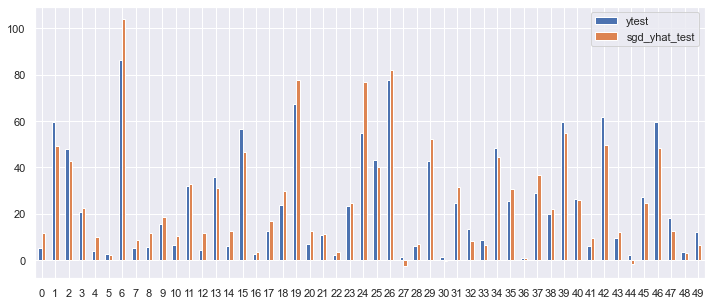

In [214]:
# create a temporary dataframe containing two columns
sgd_df_tmp = pd.DataFrame({"ytest": ytest[:50], "sgd_yhat_test": sgd_yhat_test[:50]})
# plot the dataframe
sgd_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

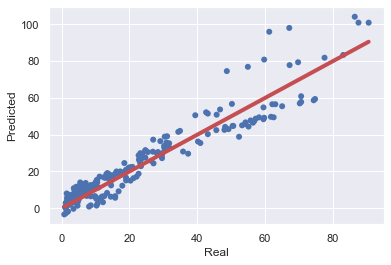

In [215]:
fig, ax = plt.subplots()
ax.scatter(ytest, sgd_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [216]:
RMSE_test = {
    'Baseline ' : [baseline_rmse],
    'Linear Regression' : [lin_test_rmse.mean()],
    'Decision Trees' : [dtree_test_rmse],
    'Random Forest' : [rf_test_rmse],
    'Support Vector Regression' : [svr_test_rmse],
    'Ada Boost Regressor' : [adb_test_rmse],
    'Lasso Regressor' : [lasso_test_rmse],
    'Ridge Regressor' : [ridge_test_rmse],
    'XGBoost Regressor' : [xgb_test_rmse],
    'Gradient Boost Regressor' : [gbr_test_rmse],
    'Stochastic Gradient Descent Regressor' : [sgd_test_rmse]
}

test_scores_df = pd.DataFrame(RMSE_test).transpose()
test_scores_df.columns=['RMSE_test']
test_scores_df["Vs Baseline"] = 100*(baseline_rmse - test_scores_df["RMSE_test"] )/baseline_rmse

#Listing scores from test data
test_scores_df

,RMSE_test,Vs Baseline
Baseline,25.817704,0.000000
Linear Regression,9.227645,64.258460
Decision Trees,2.297457,91.101233
Random Forest,1.903630,92.626648
Support Vector Regression,2.825707,89.055156
Ada Boost Regressor,4.570726,82.296158
Lasso Regressor,7.143397,72.331402
Ridge Regressor,7.339475,71.571931
XGBoost Regressor,1.567703,93.927798
Gradient Boost Regressor,1.702118,93.407167


In [217]:
# Listing scores from training data
scores_df

,RMSE,Vs Baseline
Baseline,25.817704,0.000000
Linear Regression,5.880398,77.223388
Decision Trees,2.340800,90.933353
Random Forest,1.912627,92.591802
Support Vector Regression,0.957410,96.291655
AdaBoost Regressor,4.186421,83.784688
Lasso Regressor,2.132344,91.740770
Ridge Regressor,2.137216,91.721896
XGBoost Regressor,1.108480,95.706514
Gradient Boost Regressor,1.302483,94.955077


Looking at the model performance on test data, they seem to roughly have similar performances.
However the best model (Support Vector Regression) who performed well on training dataset, didnt perform best with test set, 
Hence looking at accuracy and model consistancy XGBoost Regressor has performed at par on both the data sets followed by Gradient Descent Regressor and Support Vector Regression


In [218]:
list_scores = [lin_test_rmse.mean(), dtree_test_rmse, dtree_test_rmse, svr_test_rmse,
               adb_test_rmse, lasso_test_rmse, ridge_test_rmse, xgb_test_rmse, gbr_test_rmse,sgd_test_rmse]
list_regressors = ['Linear','Dtr','RF','SVM','AdaBoost','Lasso','Ridge','XGBoost','Grad Boost','Stochastic Grad']

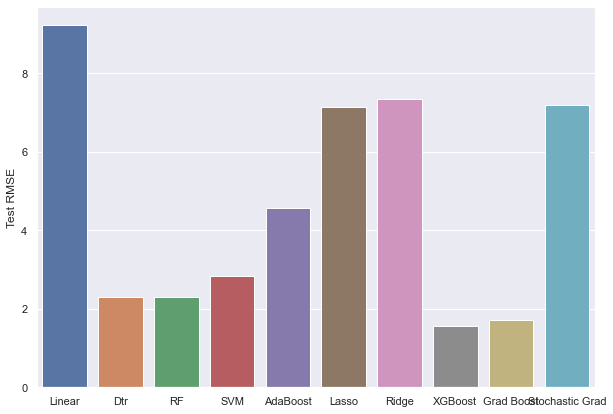

In [219]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('Test RMSE')
plt.show()

<b>Correlation of the models

In [220]:
predictions = {'Linear': lin_yhat_test, 'DTr': dtree_yhat_test, 'RF': rf_yhat_test,
               'SVM': svr_yhat_test, 'Adabost': adb_yhat_test, 'Lasso': lasso_yhat_test, 'Ridge': ridge_yhat_test,
               'XGBoost': xgb_yhat_test, 'GradBoost': gbr_yhat_test, 'Stochastic Grad': sgd_yhat_test}
df_predictions = pd.DataFrame(data=predictions) 
df_predictions.corr()

,Linear,DTr,RF,SVM,Adabost,Lasso,Ridge,XGBoost,GradBoost,Stochastic Grad
Linear,1.000000,0.919905,0.925311,0.949456,0.931234,0.991397,0.993369,0.923297,0.925619,0.991370
DTr,0.919905,1.000000,0.996702,0.988663,0.983063,0.948691,0.946199,0.995009,0.995079,0.948741
RF,0.925311,0.996702,1.000000,0.991340,0.988126,0.953952,0.951498,0.997040,0.997103,0.953877
SVM,0.949456,0.988663,0.991340,1.000000,0.974782,0.965211,0.964314,0.991546,0.991775,0.965381
Adabost,0.931234,0.983063,0.988126,0.974782,1.000000,0.960854,0.958365,0.985090,0.985893,0.960570
Lasso,0.991397,0.948691,0.953952,0.965211,0.960854,1.000000,0.999813,0.952352,0.954242,0.999878
Ridge,0.993369,0.946199,0.951498,0.964314,0.958365,0.999813,1.000000,0.949952,0.951857,0.999745
XGBoost,0.923297,0.995009,0.997040,0.991546,0.985090,0.952352,0.949952,1.000000,0.999822,0.952360
GradBoost,0.925619,0.995079,0.997103,0.991775,0.985893,0.954242,0.951857,0.999822,1.000000,0.954245
Stochastic Grad,0.991370,0.948741,0.953877,0.965381,0.960570,0.999878,0.999745,0.952360,0.954245,1.000000


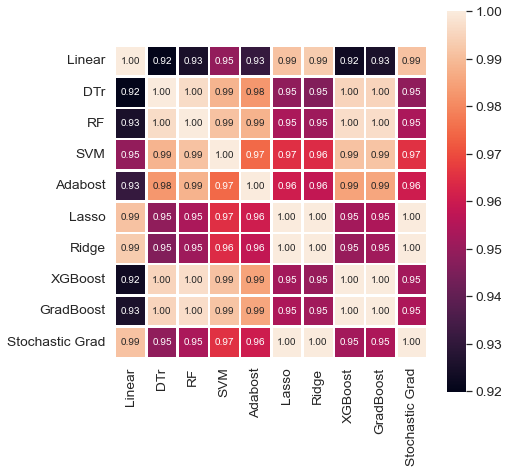

In [221]:
plt.figure(figsize=(7, 7))
sns.set(font_scale=1.25)
sns.heatmap(df_predictions.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=df_predictions.columns , xticklabels=df_predictions.columns
            )
plt.show()

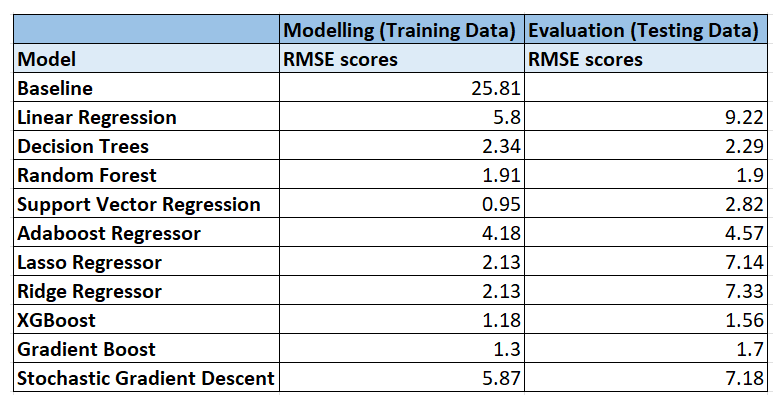


At the onset of evaluation, it is seen that XGBoost has better RMSE scores followed by Gradient Boost Regressor and Random Forest
<br>
<br>

Looking at feature importance for random forest and decision tree models, <b>LFE</b> is the <b>most important predictor<b> followed by the year,ASMR,median income,specific age ranges,number of jobs in the region, smoking habits and death.

In [222]:
#Feature Importance
#We will check the feature importance of the 3 best performing models 

xgb_feature_imp = best_xgb.feature_importances_ 

gbr_feature_imp = best_gbr.feature_importances_ 

rf_feature_imp = best_rforest.feature_importances_



In [223]:
print("Feature importance for XG Boost Regressor")
xgb_imp_df =pd.DataFrame(xgb_feature_imp,Xtrain.columns)
xgb_imp_df.rename(columns={0:'Feature importance'},inplace=True)
xgb_imp_df.sort_values('Feature importance',ascending = False)

Feature importance for XG Boost Regressor


,Feature importance
LFE,0.625646
Year_2021,0.150900
Sex_Male,0.060086
Age_90+,0.049586
Household_Deprived_1_more_dimension,0.033314
ASMR,0.029510
Marital_status_Widowed,0.005698
Region_East of England,0.004216
Region_North West,0.004195
Marital_status_Divorced,0.003731


In [224]:
print("Feature importance for Gradient Boost Regressor")
gbr_imp_df =pd.DataFrame(gbr_feature_imp,Xtrain.columns)
gbr_imp_df.rename(columns={0:'Feature importance'},inplace=True)
gbr_imp_df.sort_values('Feature importance',ascending = False)

Feature importance for Gradient Boost Regressor


,Feature importance
LFE,0.936946
Year_2021,0.029525
ASMR,0.010825
Household_Deprived_1_more_dimension,0.007964
Year_2011,0.004343
Sex_Male,0.002806
Fertility_Rate,0.002371
Age_90+,0.001680
Marital_status_Widowed,0.000957
No_Of_Jobs,0.000909


In [225]:
print("Feature importance for Random Forest")
rf_imp_df =pd.DataFrame(rf_feature_imp,Xtrain.columns)
rf_imp_df.rename(columns={0:'Feature importance'},inplace=True)
rf_imp_df.sort_values('Feature importance',ascending = False)

Feature importance for Random Forest


,Feature importance
LFE,0.937299
Year_2021,0.023999
Household_Deprived_1_more_dimension,0.010859
ASMR,0.006501
Age_80 to 84,0.004689
Fertility_Rate,0.003773
Sex_Male,0.002081
Age_90+,0.001745
Age_75 to 79,0.001356
Marital_status_Widowed,0.001350


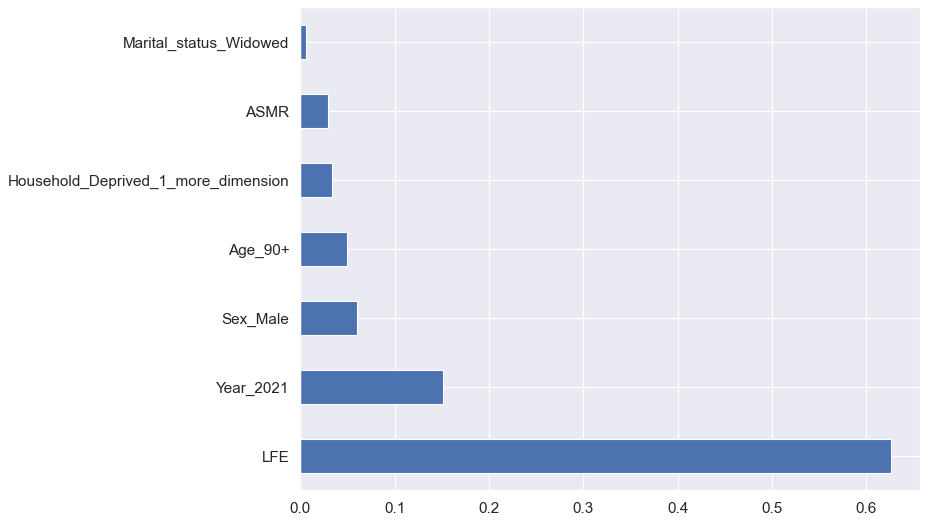

In [226]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(xgb_feature_imp, index= Xtrain.columns)

feat_importances.nlargest(7).plot(kind='barh')

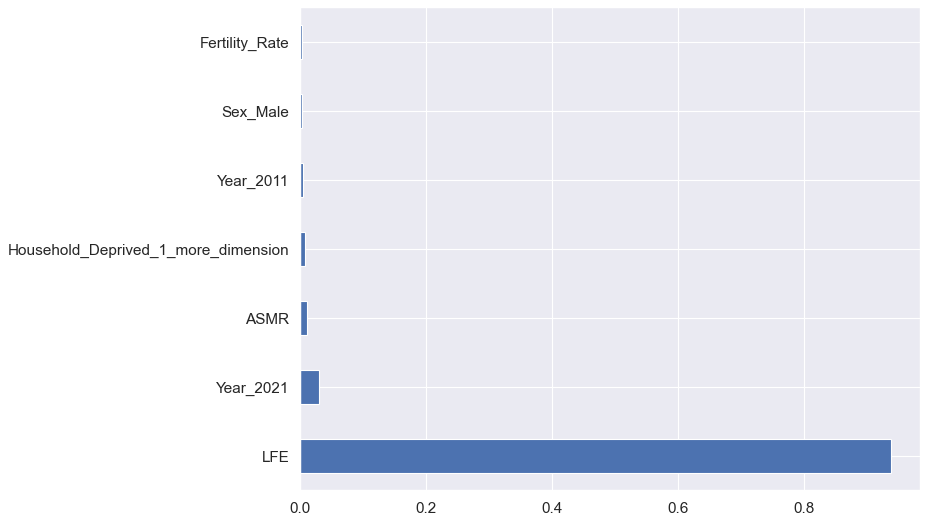

In [227]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(gbr_feature_imp, index= Xtrain.columns)

feat_importances.nlargest(7).plot(kind='barh')

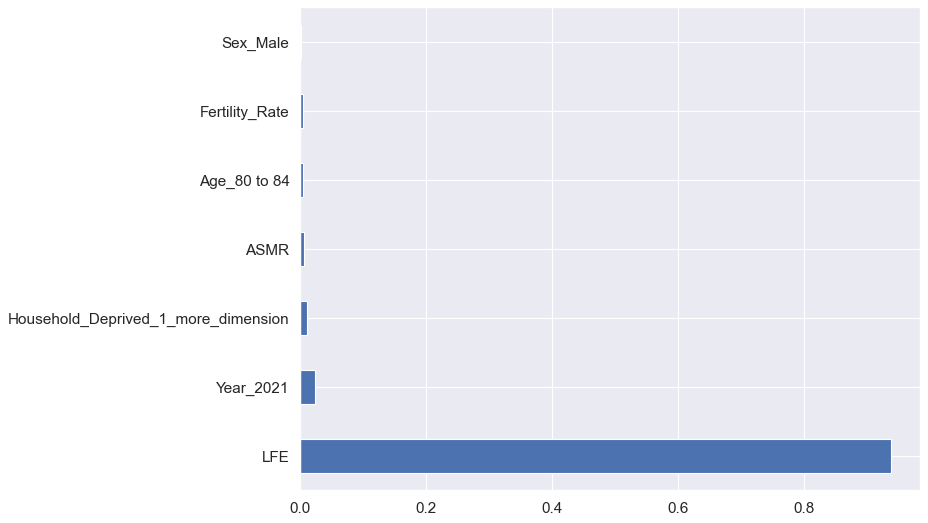

In [228]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(rf_feature_imp, index= Xtrain.columns)

feat_importances.nlargest(7).plot(kind='barh')


